# Dataset: "Verified_Processed_Dataset.csv"

# Exploratory Data Analysis (EDA) Part

Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
import plotly.express as px
from scipy.stats import zscore

Loading Dataset csv file

In [7]:
df = pd.read_csv("Verified_Processed_Dataset.csv")

1. Data Understanding and Exploration:

Total Records & Columns

In [6]:
print("Total rows:", df.shape[0])
print("Total columns:", df.shape[1])

Total rows: 8246
Total columns: 32


all column's (names) list

In [5]:
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: Learner SignUp DateTime
1: Opportunity Id
2: Opportunity Name
3: Opportunity Category
4: Opportunity End Date
5: First Name
6: Date of Birth
7: Gender
8: Country
9: Institution Name
10: Current/Intended Major
11: Entry created at
12: Status Description
13: Status Code
14: Apply Date
15: Opportunity Start Date
16: Age 
17: Opportunity Duration
18: Normalized Age
19: Normalized Status Code
20: Normalized Opportunity Duration
21: Encoded Gender
22: Encoded Opportunity Category
23: Encoded Country
24: Extracted SignUp month
25: Extracted SignUp Year
26: Extracted SignUp Day
27: Weekly Patterns
28: Seasonal Patterns
29: Engagement Days
30: Duration × Age
31: Engagement Score


Data Types & Basic Info

In [119]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8246 entries, 0 to 8245
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Learner SignUp DateTime          8246 non-null   object 
 1   Opportunity Id                   8246 non-null   object 
 2   Opportunity Name                 8246 non-null   object 
 3   Opportunity Category             8246 non-null   object 
 4   Opportunity End Date             8246 non-null   object 
 5   First Name                       8246 non-null   object 
 6   Date of Birth                    8246 non-null   object 
 7   Gender                           8246 non-null   object 
 8   Country                          8246 non-null   object 
 9   Institution Name                 8246 non-null   object 
 10  Current/Intended Major           8246 non-null   object 
 11  Entry created at                 8246 non-null   object 
 12  Status Description  

Descriptive Statistics

In [5]:
print(df.describe())

       Status Code         Age   Opportunity Duration  Normalized Age  \
count  8246.000000  8246.000000           8246.000000     8246.000000   
mean   1052.186515    25.456706            486.503292        0.326891   
std      21.665849     4.336149             34.580794        0.151775   
min    1010.000000    14.000000            430.470874        0.000000   
25%    1030.000000    23.000000            468.575579        0.227273   
50%    1050.000000    25.000000            493.978715        0.318182   
75%    1070.000000    27.000000            493.978715        0.409091   
max    1120.000000    59.000000            532.083420        0.681818   

       Normalized Status Code  Normalized Opportunity Duration  \
count             8246.000000                           8246.0   
mean                 0.239164                              0.0   
std                  0.240992                              0.0   
min                  0.000000                              0.0   
25%         

Identifying missing (NaN / null) values

In [121]:
# Show rows with missing values
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [Learner SignUp DateTime, Opportunity Id, Opportunity Name, Opportunity Category, Opportunity End Date, First Name, Date of Birth, Gender, Country, Institution Name, Current/Intended Major, Entry created at, Status Description, Status Code, Apply Date, Opportunity Start Date, Age , Opportunity Duration, Normalized Age, Normalized Status Code, Normalized Opportunity Duration, Encoded Gender, Encoded Opportunity Category, Encoded Country, Extracted SignUp month, Extracted SignUp Year, Extracted SignUp Day, Weekly Patterns, Seasonal Patterns, Engagement Days, Duration × Age, Engagement Score]
Index: []

[0 rows x 32 columns]


In [122]:
# Count missing values per column
print(df.isnull().sum())

# Check if dataset has any missing values at all
print("Any missing values?:", df.isnull().values.any())

# Total number of missing values
print("Total missing values:", df.isnull().sum().sum())

Learner SignUp DateTime            0
Opportunity Id                     0
Opportunity Name                   0
Opportunity Category               0
Opportunity End Date               0
First Name                         0
Date of Birth                      0
Gender                             0
Country                            0
Institution Name                   0
Current/Intended Major             0
Entry created at                   0
Status Description                 0
Status Code                        0
Apply Date                         0
Opportunity Start Date             0
Age                                0
Opportunity Duration               0
Normalized Age                     0
Normalized Status Code             0
Normalized Opportunity Duration    0
Encoded Gender                     0
Encoded Opportunity Category       0
Encoded Country                    0
Extracted SignUp month             0
Extracted SignUp Year              0
Extracted SignUp Day               0
W

Checking Duplicates

In [123]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


Checking Outliers

Outliers usually matter in numeric columns.

NEEDED: The most important for real outlier analysis will be-
Opportunity Duration, Normalized Age, Normalized Opportunity Duration, Duration × Age, Engagement Score.

NO NEEDED: For encoded categorical variables (Encoded Gender, Encoded Country, etc.), outlier detection usually isn’t meaningful since they’re discrete codes. Also textual / categorical / IDs / dates → won’t have meaningful outliers.
Examples: Opportunity Id, Opportunity Name, Country, Institution Name, First Name, Gender, Date of Birth, Opportunity Start Date, etc.

In [125]:
# Select important numeric columns (exact names from your dataset)
cols_to_check = [                        # has trailing space
    "Opportunity Duration", 
    "Normalized Age", 
    "Normalized Opportunity Duration", 
    "Duration × Age",              # special multiplication sign
    "Engagement Score"
]

# Calculate IQR
Q1 = df[cols_to_check].quantile(0.25)
Q3 = df[cols_to_check].quantile(0.75)
IQR = Q3 - Q1

# Outlier condition
outliers = ((df[cols_to_check] < (Q1 - 1.5 * IQR)) | 
            (df[cols_to_check] > (Q3 + 1.5 * IQR)))

# Outlier counts per column
print("Outlier counts per column (IQR method):")
print(outliers.sum())

Outlier counts per column (IQR method):
Opportunity Duration               0
Normalized Age                     0
Normalized Opportunity Duration    0
Duration × Age                     0
Engagement Score                   0
dtype: int64


2. Uncovering Relationships Between Variables:

Correlation Analysis (Numeric Variables)

Heatmaps (Highlight Correlations or Anomalies)

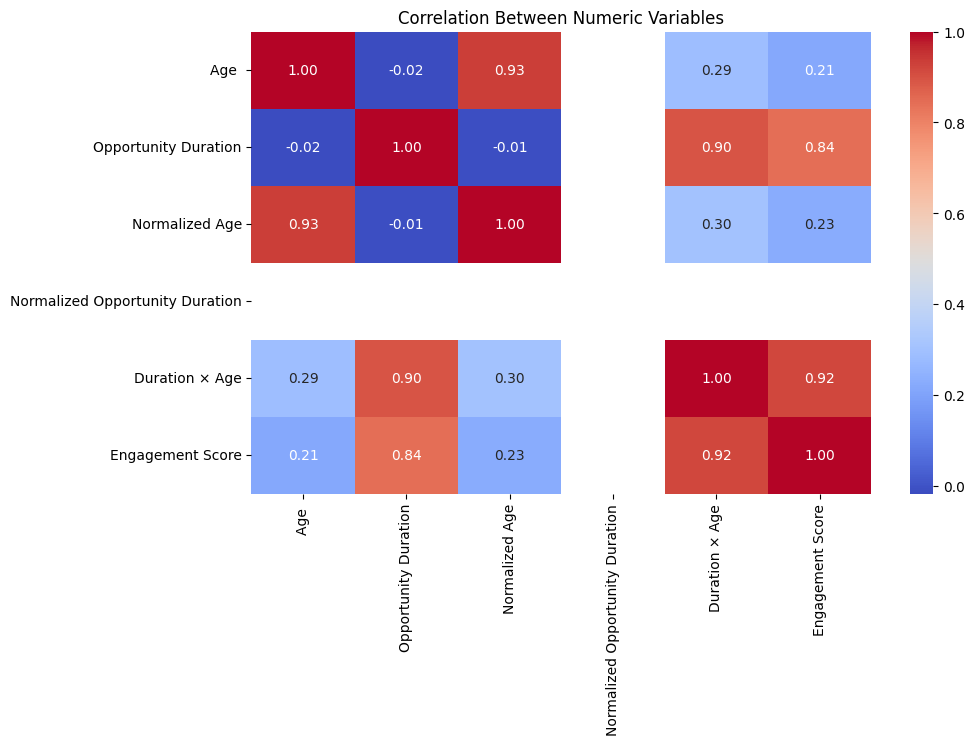

In [127]:
# Select numeric columns for correlation
numeric_cols = ["Age ", "Opportunity Duration", "Normalized Age", 
                "Normalized Opportunity Duration", "Duration × Age", "Engagement Score"]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Variables")
plt.show()

A matrix showing counts of users for each combination of Opportunity Category (rows) and Status Description (columns). This is essentially a cross-tabulation heatmap.

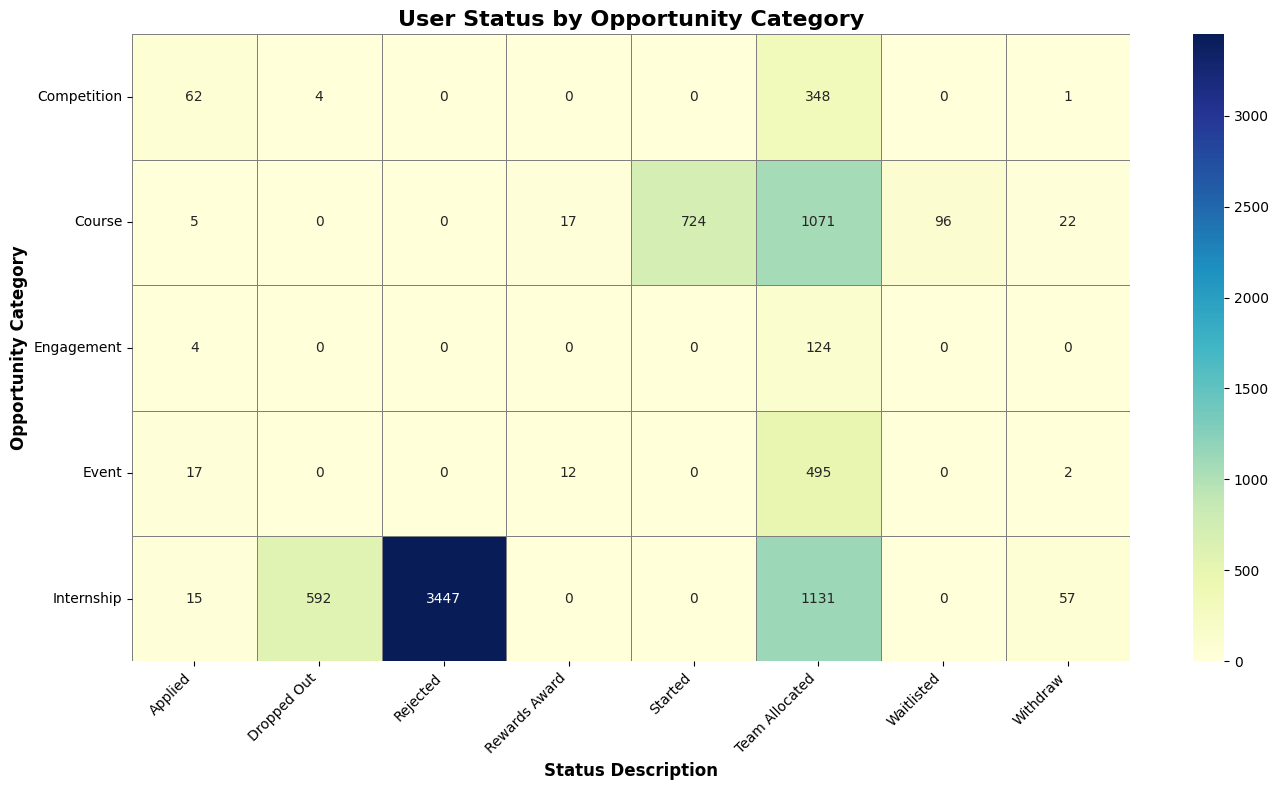

In [28]:
# Ensure the columns exist
if 'Opportunity Category' in df.columns and 'Status Description' in df.columns:
    
    # Create a cross-tabulation table
    category_status_matrix = pd.crosstab(df['Opportunity Category'], df['Status Description'])
    
    # Plot heatmap
    plt.figure(figsize=(14, 8))
    sns.heatmap(category_status_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=True,
                linewidths=0.5, linecolor='gray')
    plt.title('User Status by Opportunity Category', fontsize=16, fontweight='bold')
    plt.xlabel('Status Description', fontsize=12, fontweight='bold')
    plt.ylabel('Opportunity Category', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("Required columns not found in the dataset.")

Scatter Plots (Visual Relationships)

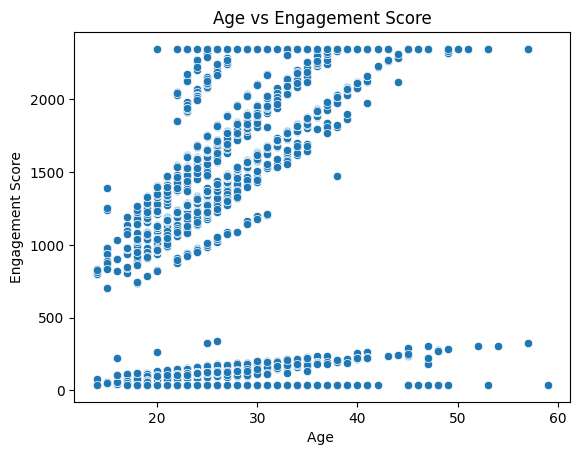

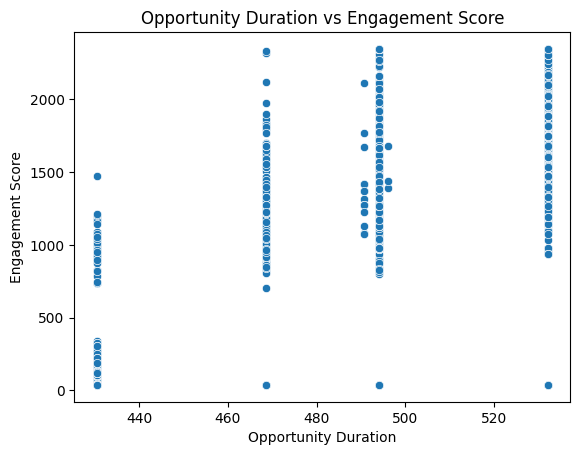

In [12]:
# Age vs Engagement Score
sns.scatterplot(data=df, x="Age ", y="Engagement Score")
plt.title("Age vs Engagement Score")
plt.show()

# Opportunity Duration vs Engagement Score
sns.scatterplot(data=df, x="Opportunity Duration", y="Engagement Score")
plt.title("Opportunity Duration vs Engagement Score")
plt.show()

Boxplots (Categorical vs Numeric Relationships)

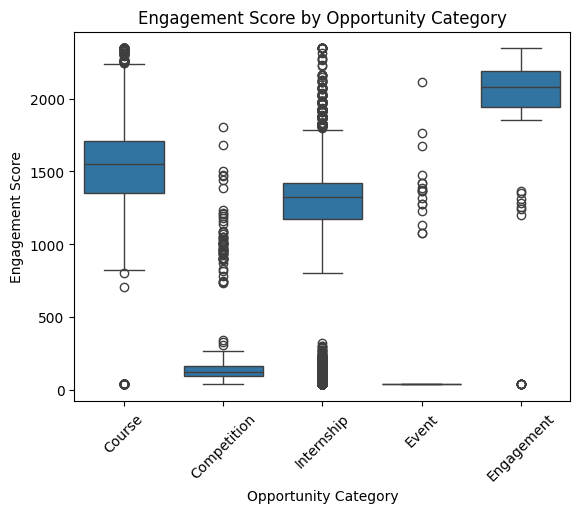

In [35]:
# Engagement Score across Opportunity Categories
sns.boxplot(data=df, x="Opportunity Category", y="Engagement Score")
plt.xticks(rotation=45)
plt.title("Engagement Score by Opportunity Category")
plt.show()


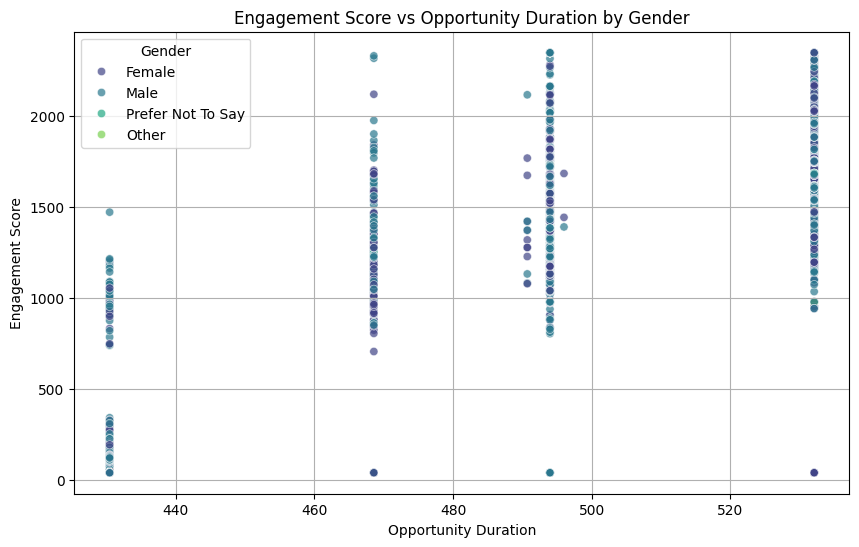

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='Opportunity Duration', 
    y='Engagement Score', 
    hue='Gender', 
    palette='viridis',
    alpha=0.7
)
plt.title("Engagement Score vs Opportunity Duration by Gender")
plt.xlabel("Opportunity Duration")
plt.ylabel("Engagement Score")
plt.legend(title='Gender')
plt.grid(True)
plt.show()

3. Visualizing Data Trends and Patterns:

Reveal Patterns and Trends: (NUMERICS)

Distribution of Numeric Variables

Combined Histograms with Density Overlay

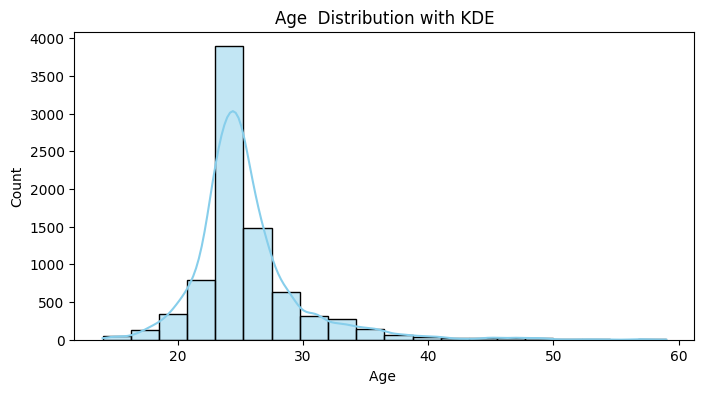

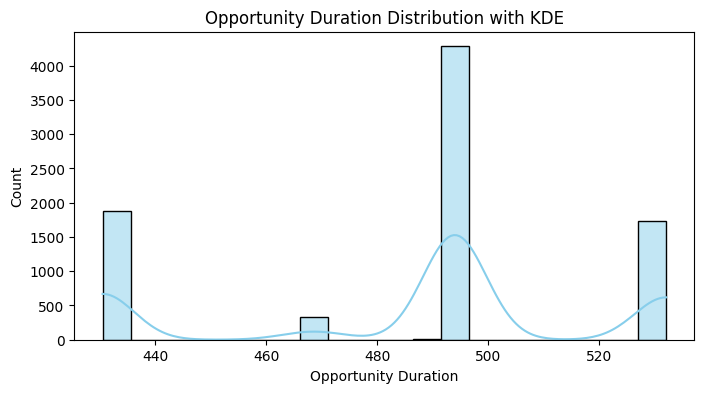

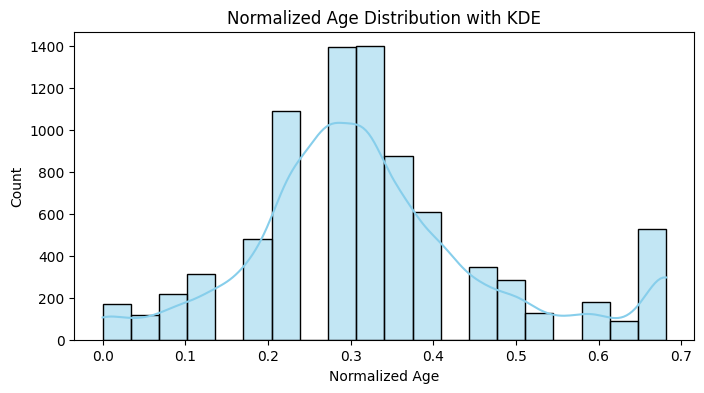

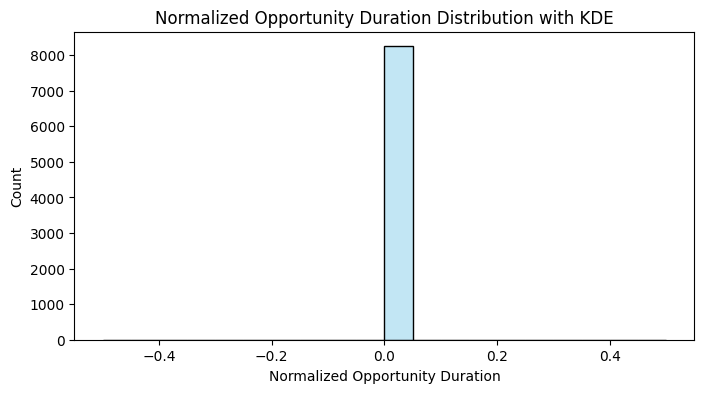

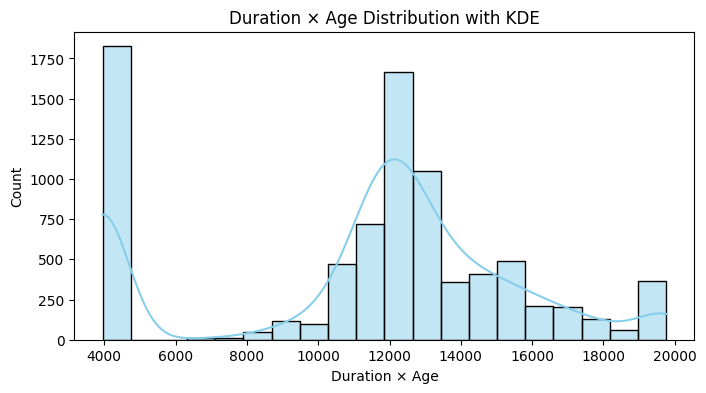

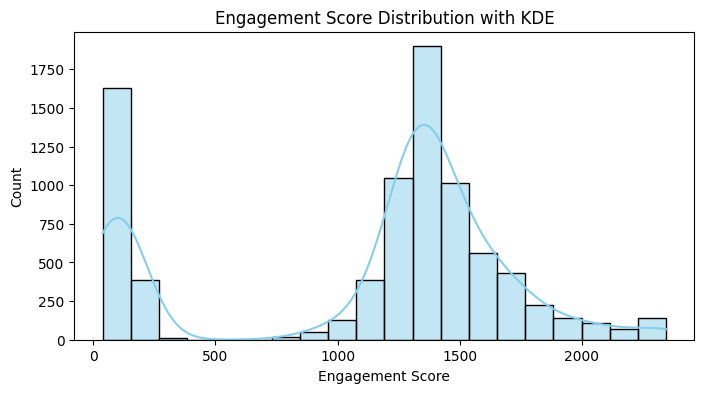

In [51]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f"{col} Distribution with KDE")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

4. Calculating initial summary statistics

In [56]:
# Select numeric columns
numeric_cols = ["Age ", "Opportunity Duration", "Normalized Age", 
                "Normalized Opportunity Duration", "Duration × Age", "Engagement Score"]

# Basic summary statistics
summary_stats = df[numeric_cols].describe().T  # Transpose for easier reading
summary_stats['range'] = summary_stats['max'] - summary_stats['min']  # Add range column
summary_stats['median'] = df[numeric_cols].median()  # Add median column

# Reorder columns for clarity
summary_stats = summary_stats[['count', 'mean', 'median', 'std', 'min', 'max', 'range']]

print(summary_stats)


                                  count          mean        median  \
Age                              8246.0     25.456706     25.000000   
Opportunity Duration             8246.0    486.503292    493.978715   
Normalized Age                   8246.0      0.326891      0.318182   
Normalized Opportunity Duration  8246.0      0.000000      0.000000   
Duration × Age                   8246.0  11255.051332  12080.305560   
Engagement Score                 8246.0   1120.988366   1326.818928   

                                         std          min           max  \
Age                                 4.336149    14.000000     59.000000   
Opportunity Duration               34.580794   430.470874    532.083420   
Normalized Age                      0.151775     0.000000      0.681818   
Normalized Opportunity Duration     0.000000     0.000000      0.000000   
Duration × Age                   4477.947762  3951.829720  19759.148616   
Engagement Score                  625.582652    37.8

Boxplots (for spotting outliers and spread)

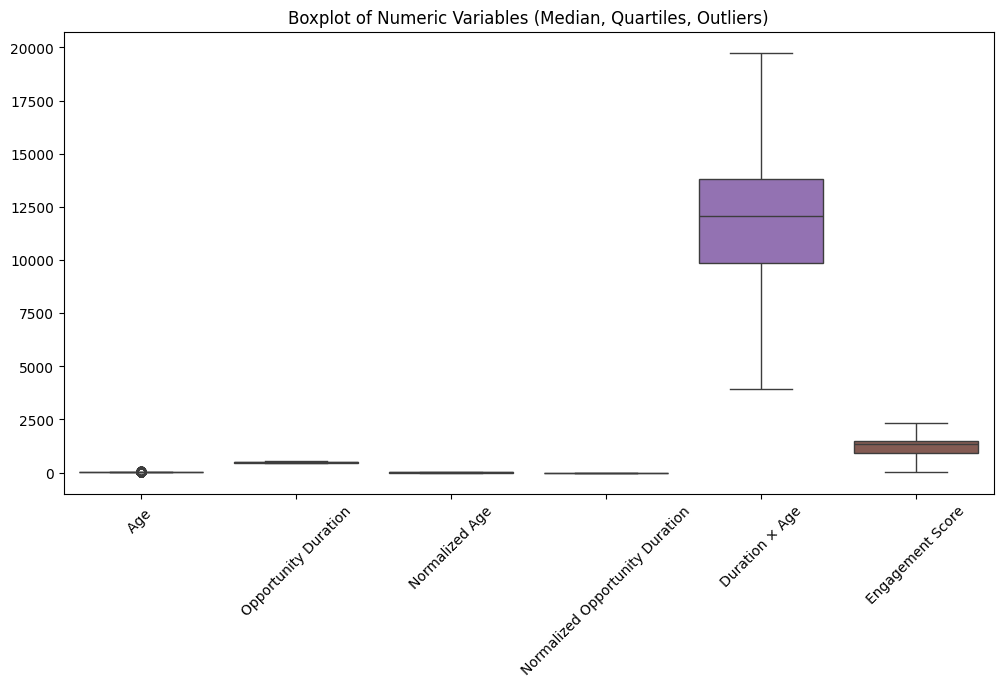

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Variables (Median, Quartiles, Outliers)")
plt.xticks(rotation=45)
plt.show()

Violin Plots

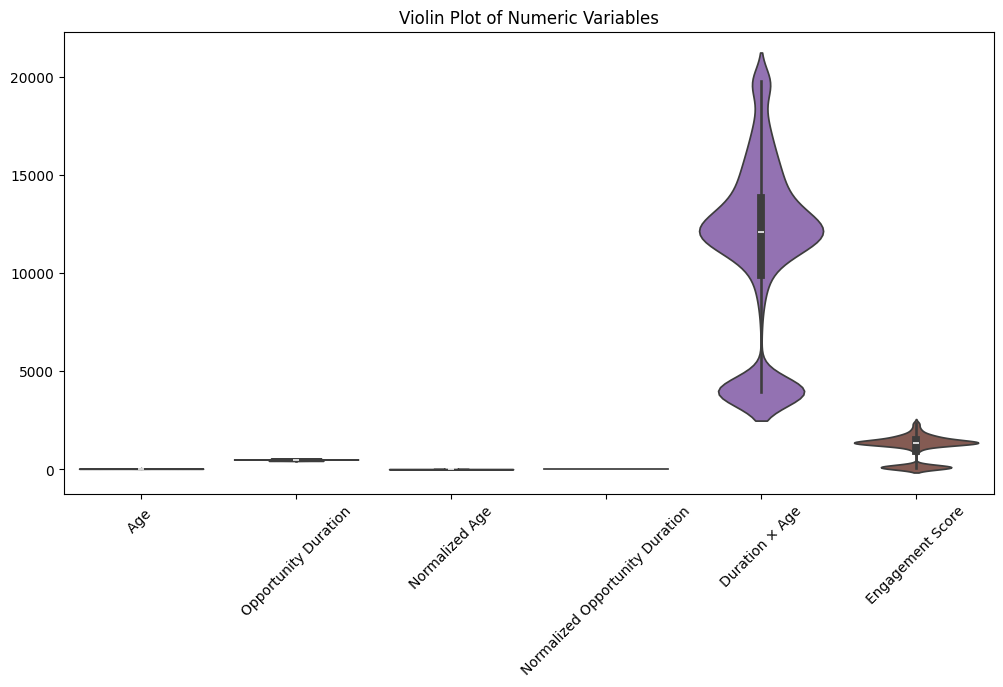

In [50]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df[numeric_cols])
plt.title("Violin Plot of Numeric Variables")
plt.xticks(rotation=45)
plt.show()

5. Highlight Key Insights:

Identifier: Learners by Opportunity Name 

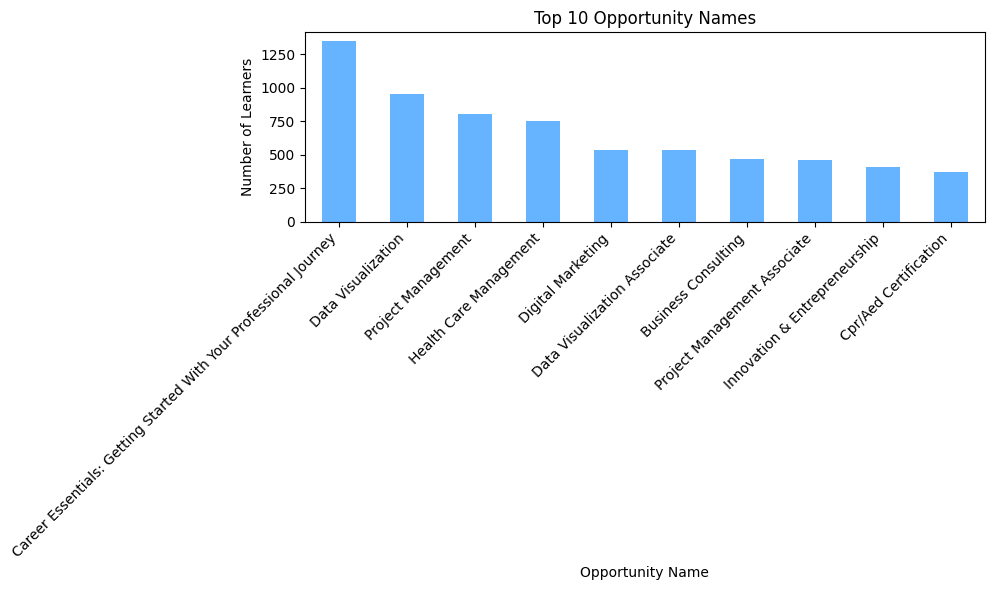

In [5]:
# Count top 10 Opportunity Names
top10 = df['Opportunity Name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10,6))
top10.plot(kind='bar', color='#66b3ff')
plt.title('Top 10 Opportunity Names')
plt.xlabel('Opportunity Name')
plt.ylabel('Number of Learners')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Categorical Variable Counts

Gender Distribution (Counts & Percentages):
Male: 4861 (58.95%)
Female: 3367 (40.83%)
Prefer Not To Say: 15 (0.18%)
Other: 3 (0.04%)


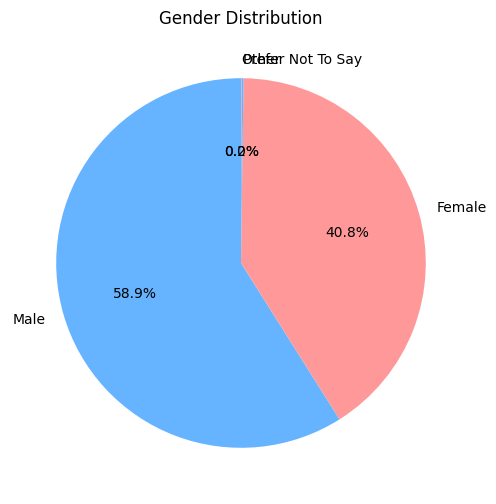

C:\Users\sumai\AppData\Local\Temp\ipykernel_2692\3883975428.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


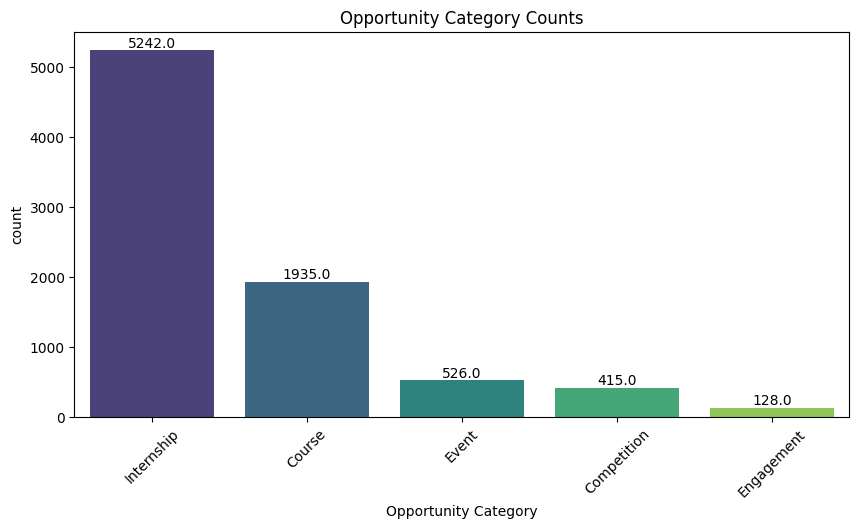

C:\Users\sumai\AppData\Local\Temp\ipykernel_2692\3883975428.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")


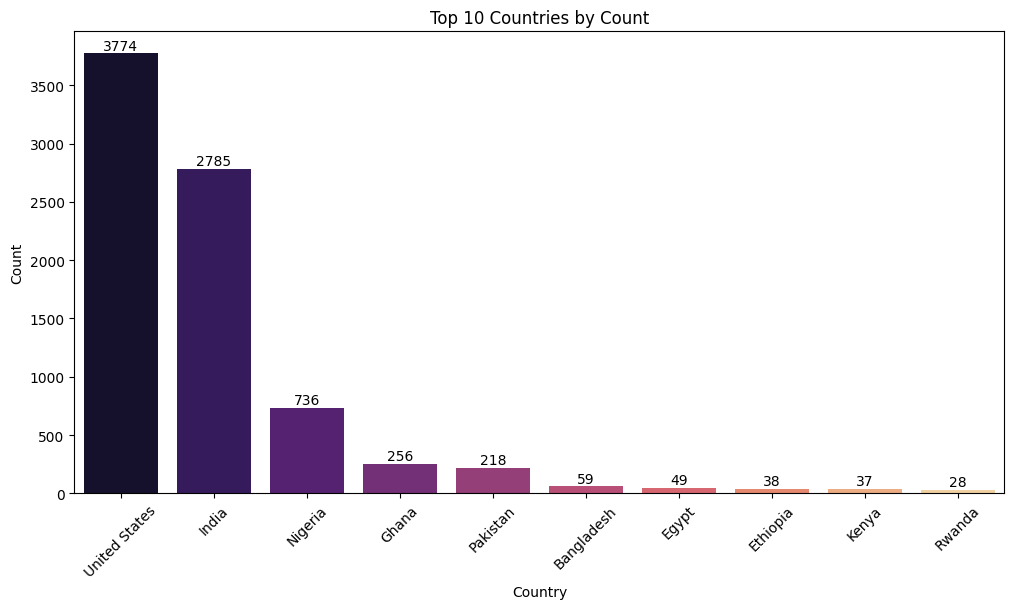

C:\Users\sumai\AppData\Local\Temp\ipykernel_2692\3883975428.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


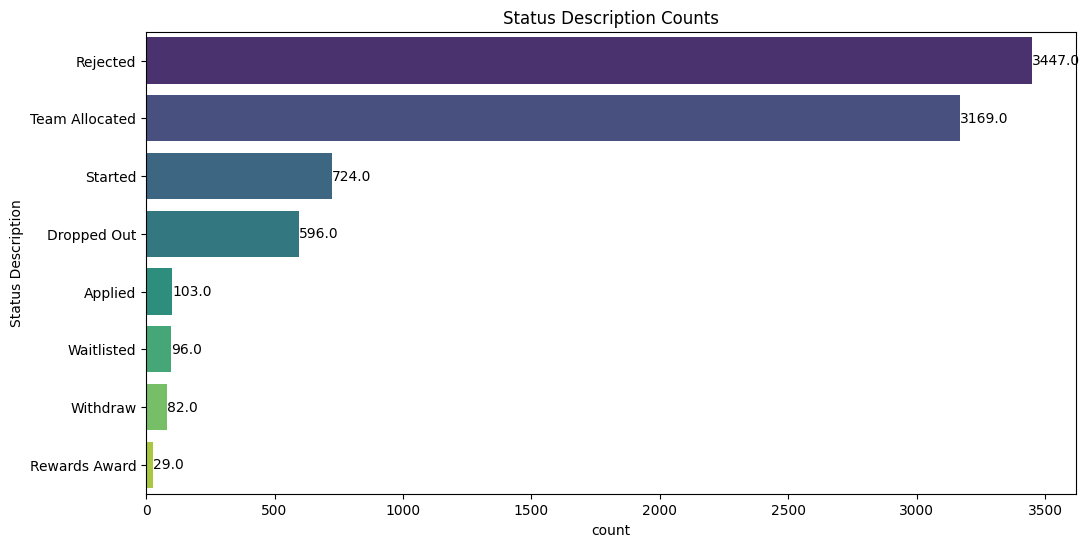

C:\Users\sumai\AppData\Local\Temp\ipykernel_2692\3883975428.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_opportunities.values, y=top_opportunities.index, palette="viridis")


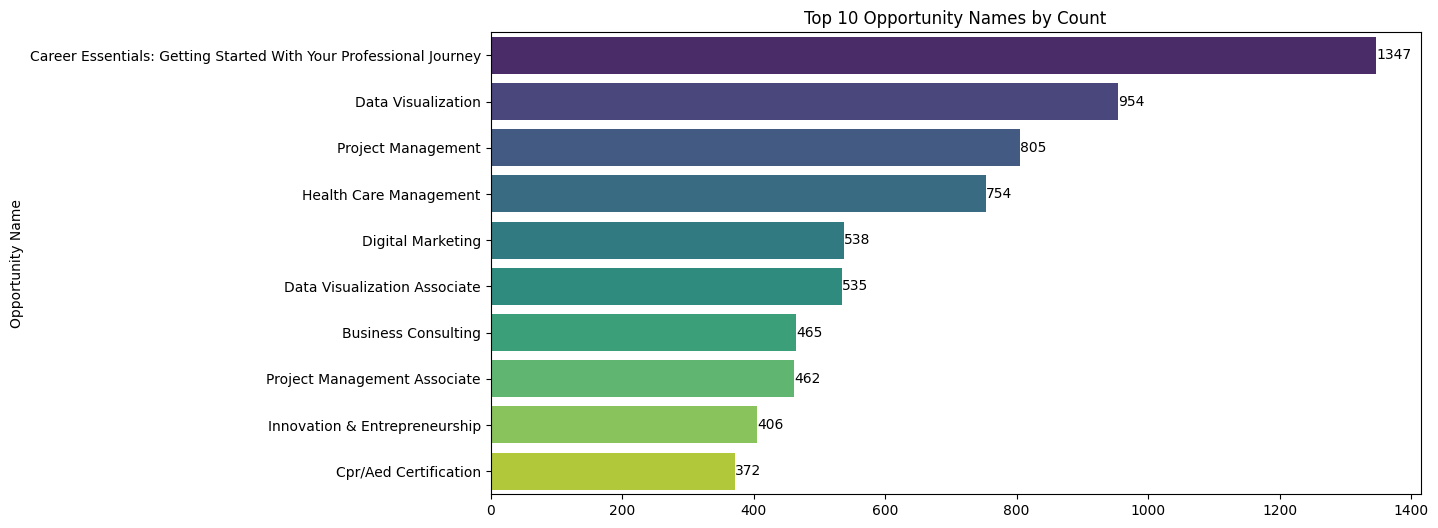

C:\Users\sumai\AppData\Local\Temp\ipykernel_2692\3883975428.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_institutions.values, y=top_institutions.index, palette='viridis')


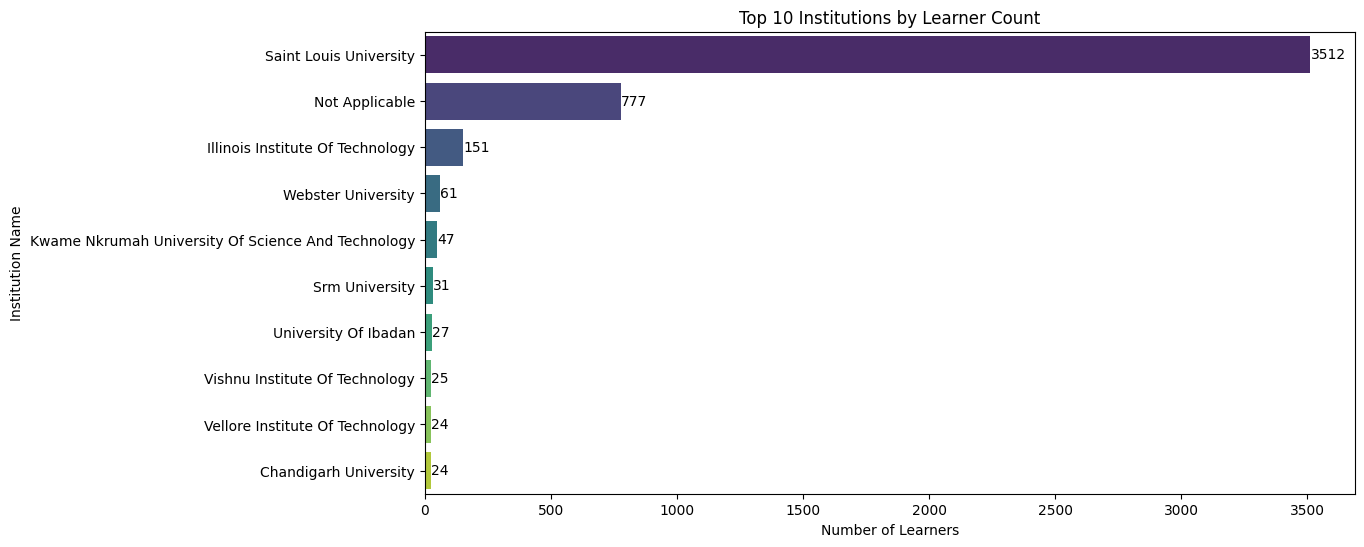

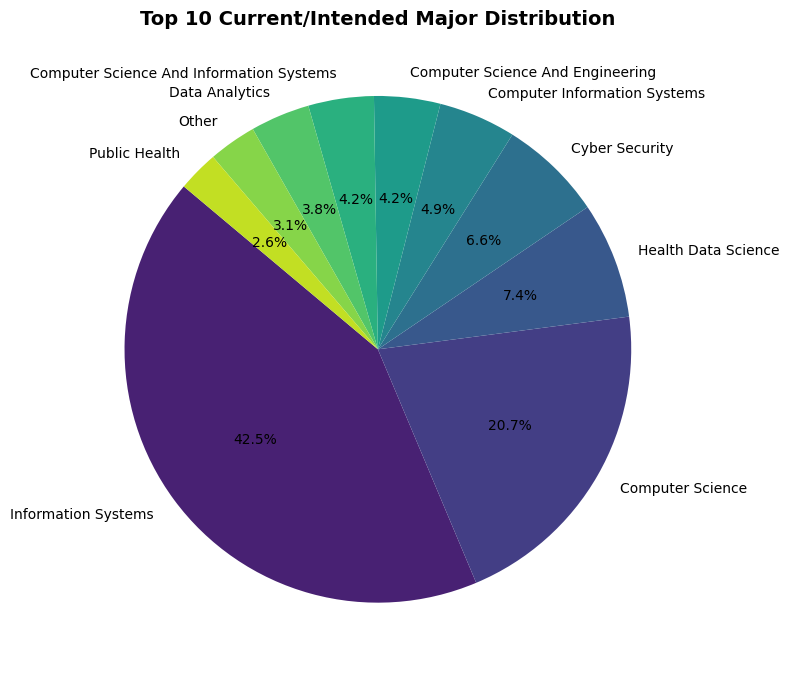

In [ ]:
#Gender - Pie Char
gender_counts = df['Gender'].value_counts(normalize=False)   # actual counts
gender_percent = df['Gender'].value_counts(normalize=True) * 100   # percentages

print("Gender Distribution (Counts & Percentages):")
for gender, count in gender_counts.items():
    print(f"{gender}: {count} ({gender_percent[gender]:.2f}%)")

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Gender Distribution")
plt.show()


# Opportunity Category - Bar Chart
plt.figure(figsize=(10,5))
ax = sns.countplot(
    data=df, 
    x='Opportunity Category', 
    order=df['Opportunity Category'].value_counts().index, 
    palette="viridis"
)

plt.xticks(rotation=45)
plt.title("Opportunity Category Counts")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom')

plt.show()


#Country - Bar Chart for Top 10
top_countries = df['Country'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="magma")
plt.title("Top 10 Countries by Count")
plt.ylabel("Count")
plt.xticks(rotation=45)

for i, val in enumerate(top_countries.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom')

plt.show()

# Status description - Row Chart 
plt.figure(figsize=(12,6))
ax = sns.countplot(
    data=df, 
    y='Status Description',  
    order=df['Status Description'].value_counts().index, 
    palette="viridis"
)
plt.title("Status Description Counts")

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', xy=(width, p.get_y() + p.get_height()/2),
                ha='left', va='center')

plt.show()

# Opportunity Name - Row Chart
top_opportunities = df['Opportunity Name'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_opportunities.values, y=top_opportunities.index, palette="viridis")
plt.title("Top 10 Opportunity Names by Count")

for i, val in enumerate(top_opportunities.values):
    ax.text(val, i, str(val), va='center', ha='left')

plt.show()

# Top 10 Institution Names - Row Chart
df['Institution Name'] = df['Institution Name'].replace("Saint Louis Univeristy", "Saint Louis University")

top_institutions = df['Institution Name'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_institutions.values, y=top_institutions.index, palette='viridis')
plt.title("Top 10 Institutions by Learner Count")
plt.xlabel("Number of Learners")
plt.ylabel("Institution Name")

for i, val in enumerate(top_institutions.values):
    ax.text(val + 1, i, str(val), va='center', ha='left')

plt.show()


# Top 10 Current/Intended Major - Pie Chart
top_Major = df['Current/Intended Major'].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(
    top_Major.values, 
    labels=top_Major.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("viridis", len(top_Major))
)
plt.title("Top 10 Current/Intended Major Distribution", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Insights Generation & Hypothesis Development

Relationships Between Variables

(a)Scatter plots for numeric relationships

(b)Boxplots for numeric vs categorical relationships

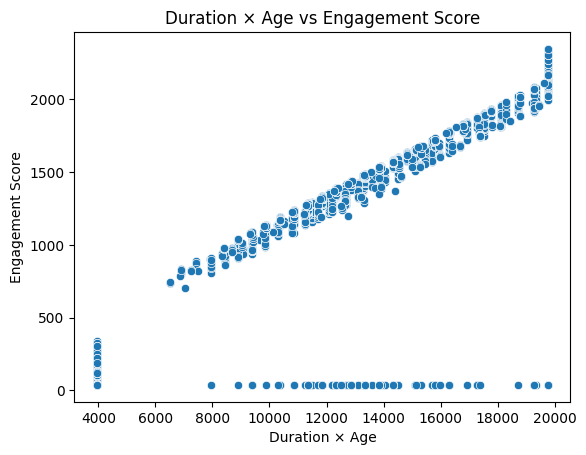

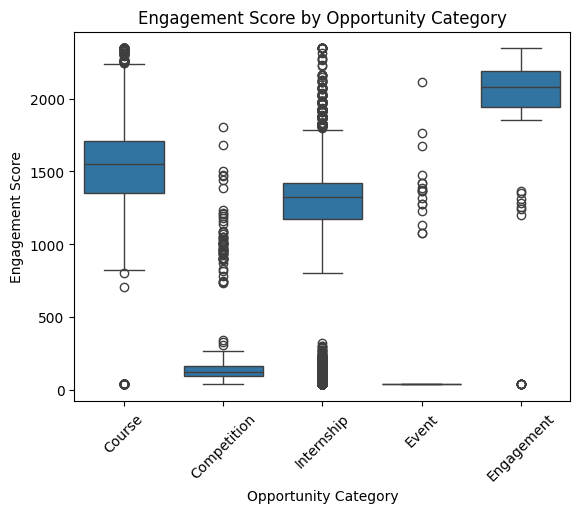

In [39]:
# Scatter plot: Duration × Age vs Engagement Score
sns.scatterplot(data=df, x="Duration × Age", y="Engagement Score")
plt.title("Duration × Age vs Engagement Score")
plt.show()

# Boxplot: Engagement Score across Opportunity Categories
sns.boxplot(data=df, x="Opportunity Category", y="Engagement Score")
plt.xticks(rotation=45)
plt.title("Engagement Score by Opportunity Category")
plt.show()


C:\Users\sumai\AppData\Local\Temp\ipykernel_5740\2485884389.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\sumai\AppData\Local\Temp\ipykernel_5740\2485884389.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




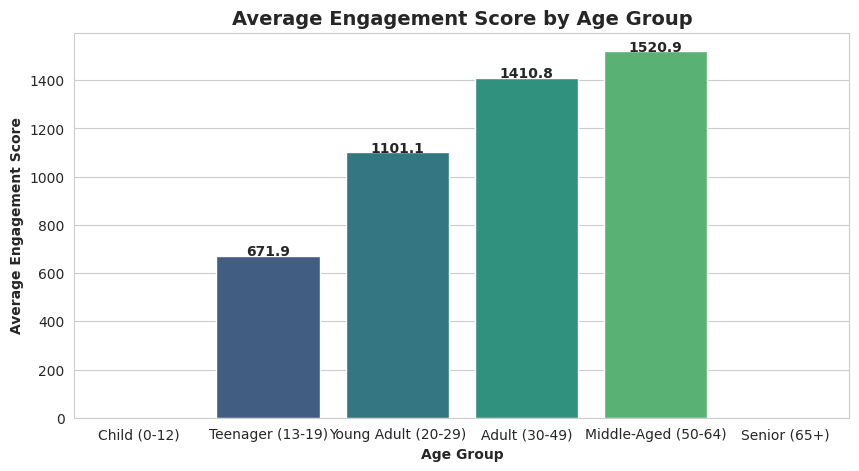

C:\Users\sumai\AppData\Local\Temp\ipykernel_5740\2485884389.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




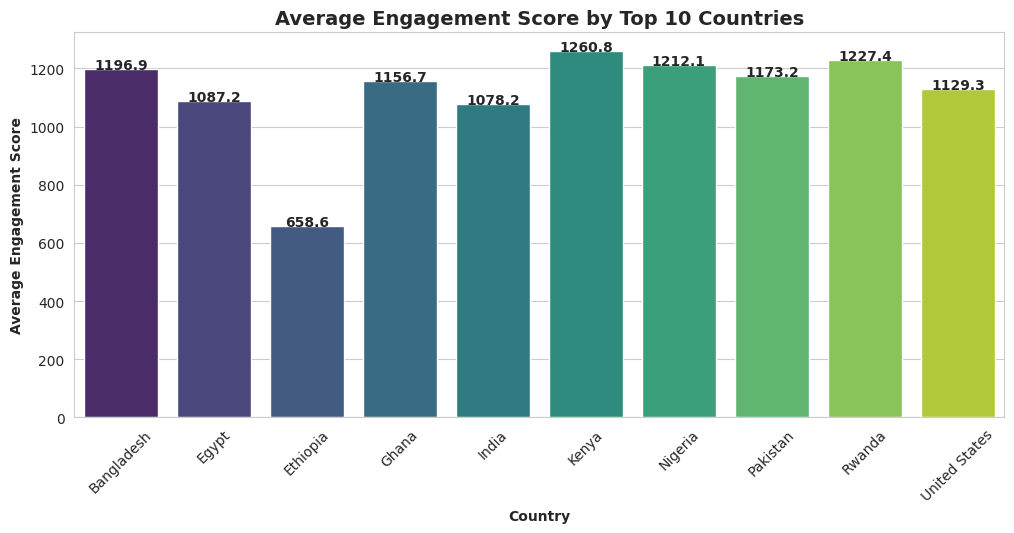

In [56]:
# Ensure 'Age Group' exists
if 'Age Group' not in df.columns:
    bins = [0, 12, 19, 29, 49, 64, 120]
    labels = ['Child (0-12)', 'Teenager (13-19)', 'Young Adult (20-29)',
              'Adult (30-49)', 'Middle-Aged (50-64)', 'Senior (65+)']
    df['Age Group'] = pd.cut(df['Age '], bins=bins, labels=labels, right=True)

# -------------------------
# Engagement by Age Group
# -------------------------
age_engagement = df.groupby('Age Group')['Engagement Score'].mean().reindex(labels)

plt.figure(figsize=(10,5))
sns.barplot(x=age_engagement.index, y=age_engagement.values, palette='viridis')
plt.title("Average Engagement Score by Age Group", fontsize=14, fontweight='bold')
plt.xlabel("Age Group", fontweight='bold')
plt.ylabel("Average Engagement Score", fontweight='bold')

# Annotate values
for i, v in enumerate(age_engagement.values):
    plt.text(i, v + 0.5, f"{v:.1f}", ha='center', fontweight='bold')

plt.show()

# -------------------------
# Engagement by Country (Top 10)
# -------------------------
top_countries = df['Country'].value_counts().head(10).index
country_engagement = df[df['Country'].isin(top_countries)].groupby('Country')['Engagement Score'].mean()

plt.figure(figsize=(12,5))
sns.barplot(x=country_engagement.index, y=country_engagement.values, palette='viridis')
plt.title("Average Engagement Score by Top 10 Countries", fontsize=14, fontweight='bold')
plt.xlabel("Country", fontweight='bold')
plt.ylabel("Average Engagement Score", fontweight='bold')
plt.xticks(rotation=45)

# Annotate values
for i, v in enumerate(country_engagement.values):
    plt.text(i, v + 0.5, f"{v:.1f}", ha='center', fontweight='bold')

plt.show()

Reveal Patterns and Trends: (DATES)

Line chart of Monthly Learner SignUps Trend

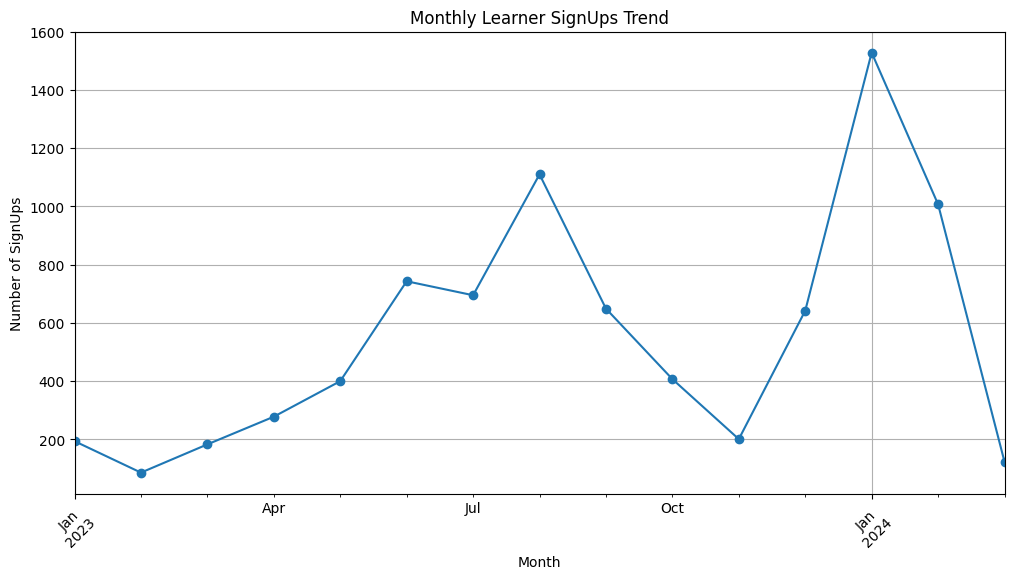

In [57]:
# Convert to datetime if not already
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'])

# Count of signups per month
monthly_signups = df.groupby(df['Learner SignUp DateTime'].dt.to_period('M')).size()

# Plot line chart
plt.figure(figsize=(12,6))
monthly_signups.plot(kind='line', marker='o')
plt.title("Monthly Learner SignUps Trend")
plt.xlabel("Month")
plt.ylabel("Number of SignUps")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Opportunity Start Date and Opportunity End Date, a line chart can reveal trends over time

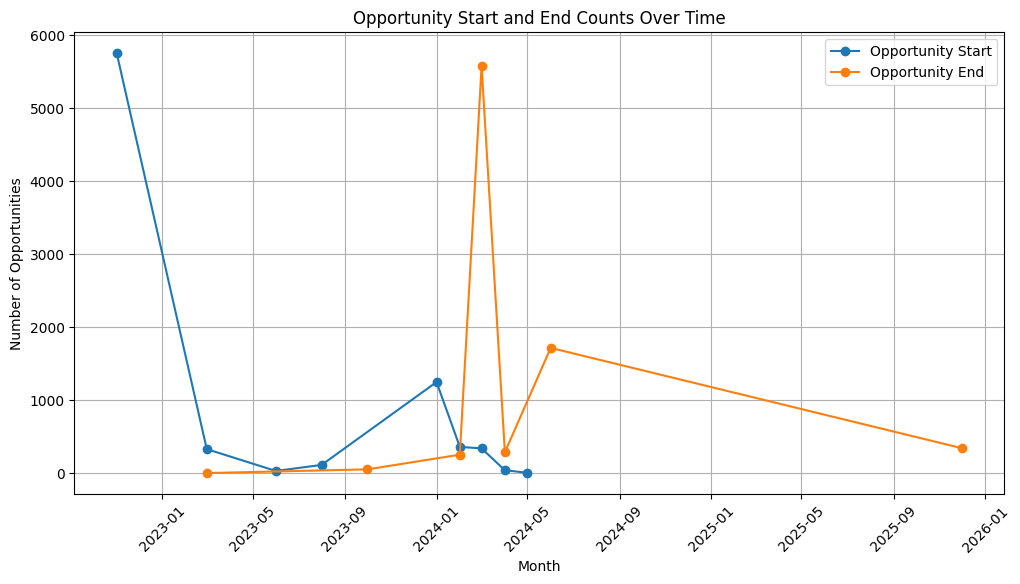

In [94]:
# Convert to datetime if not already
df['Opportunity Start Date'] = pd.to_datetime(df['Opportunity Start Date'])
df['Opportunity End Date'] = pd.to_datetime(df['Opportunity End Date'])

# Aggregate by month
start_counts = df.groupby(df['Opportunity Start Date'].dt.to_period('M')).size()
end_counts = df.groupby(df['Opportunity End Date'].dt.to_period('M')).size()

# Convert PeriodIndex to datetime for plotting
start_counts.index = start_counts.index.to_timestamp()
end_counts.index = end_counts.index.to_timestamp()

# Plot line chart
plt.figure(figsize=(12,6))
plt.plot(start_counts.index, start_counts.values, marker='o', label='Opportunity Start')
plt.plot(end_counts.index, end_counts.values, marker='o', label='Opportunity End')
plt.title("Opportunity Start and End Counts Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Opportunities")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

4. Compare Data Groups: 

Grouped Bar Chart: Compare numeric values across categories

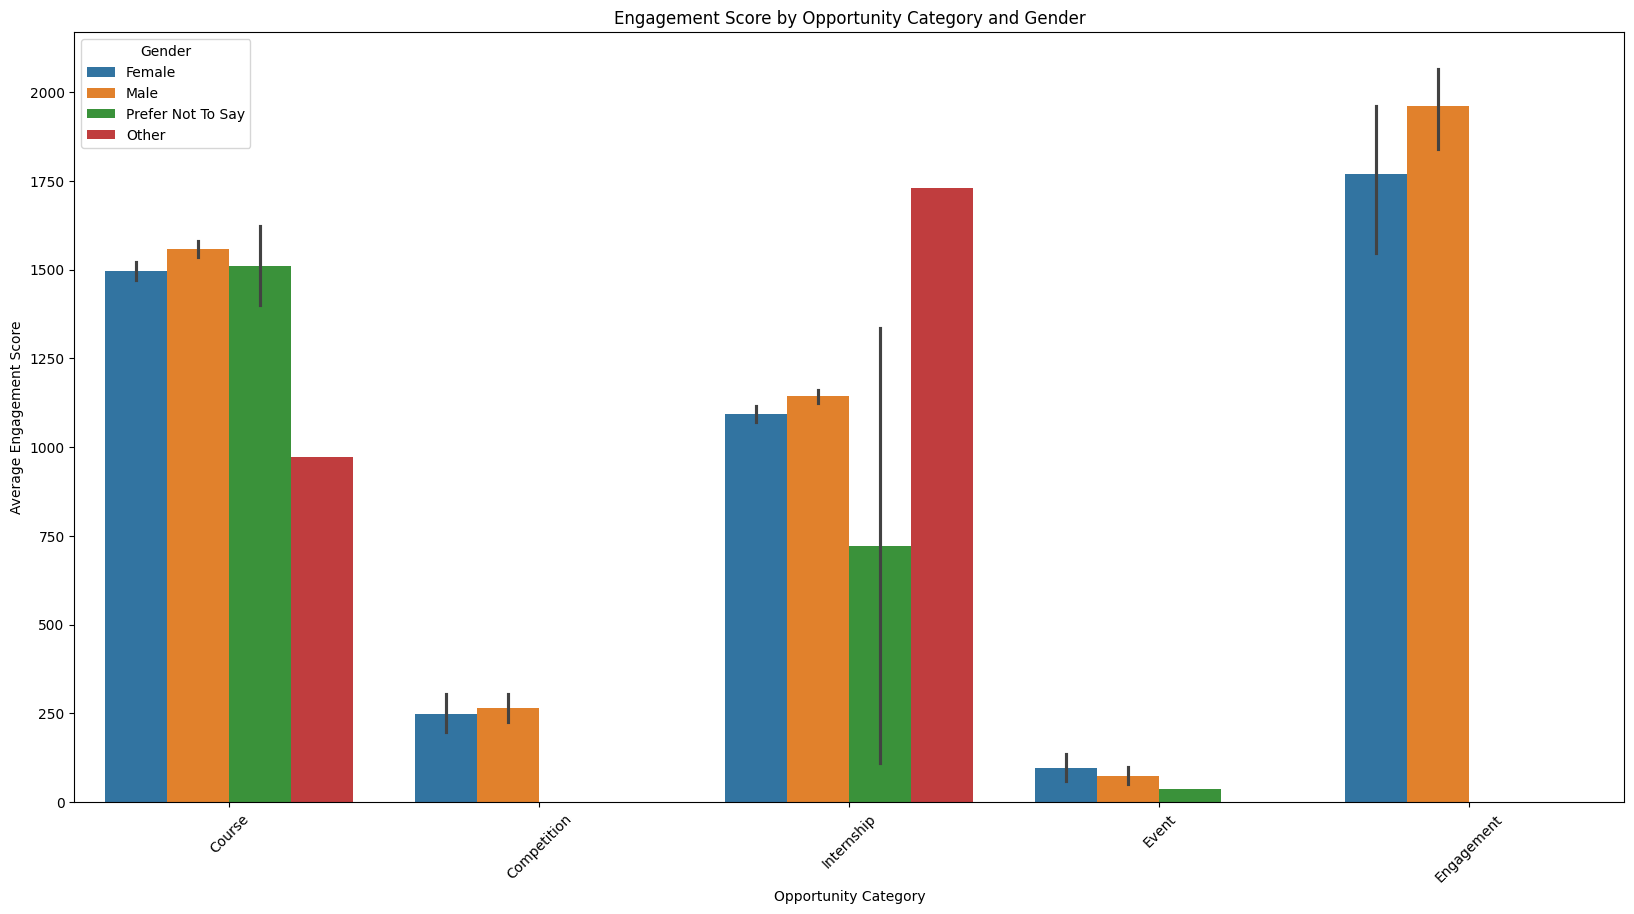

In [67]:
# Example: Average Engagement Score by Gender and Opportunity Category
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='Opportunity Category', y='Engagement Score', hue='Gender')
plt.title("Engagement Score by Opportunity Category and Gender")
plt.xticks(rotation=45)
plt.ylabel("Average Engagement Score")
plt.show()

Stacked Bar Charts (Comparison Across Multiple Categories)

Comparing multiple categorical variables in one chart.

Example: Engagement Score distribution across Opportunity Category and Gender.

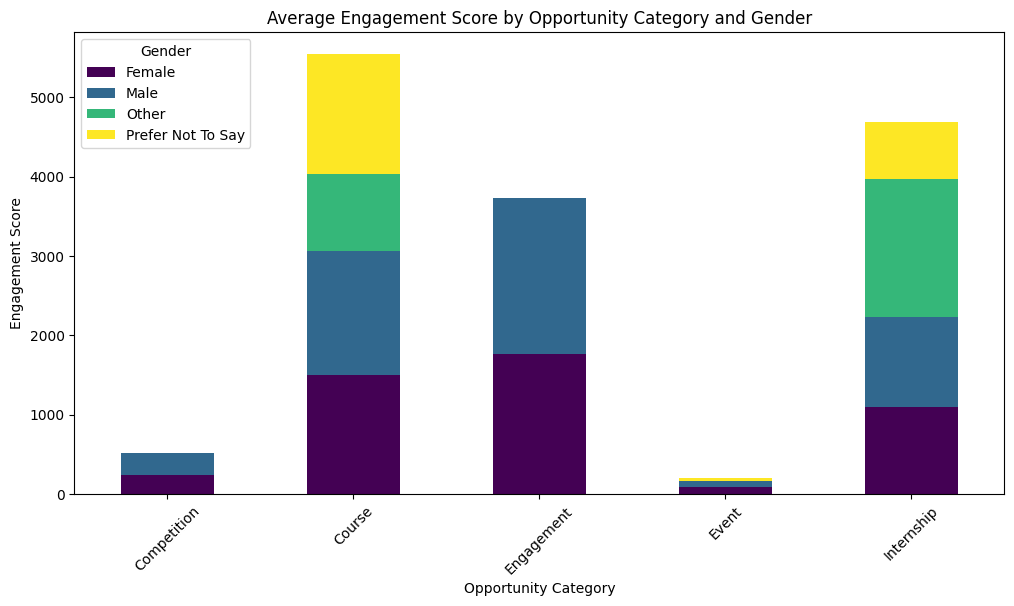

In [80]:
# Aggregate data: mean Engagement Score by Opportunity Category and Gender
agg_df = df.groupby(['Opportunity Category', 'Gender'])['Engagement Score'].mean().unstack()

# Stacked bar chart
agg_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title("Average Engagement Score by Opportunity Category and Gender")
plt.ylabel("Engagement Score")
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

Top 10 Current/Intended Major have been taken by Top 10 First Names- Analysis

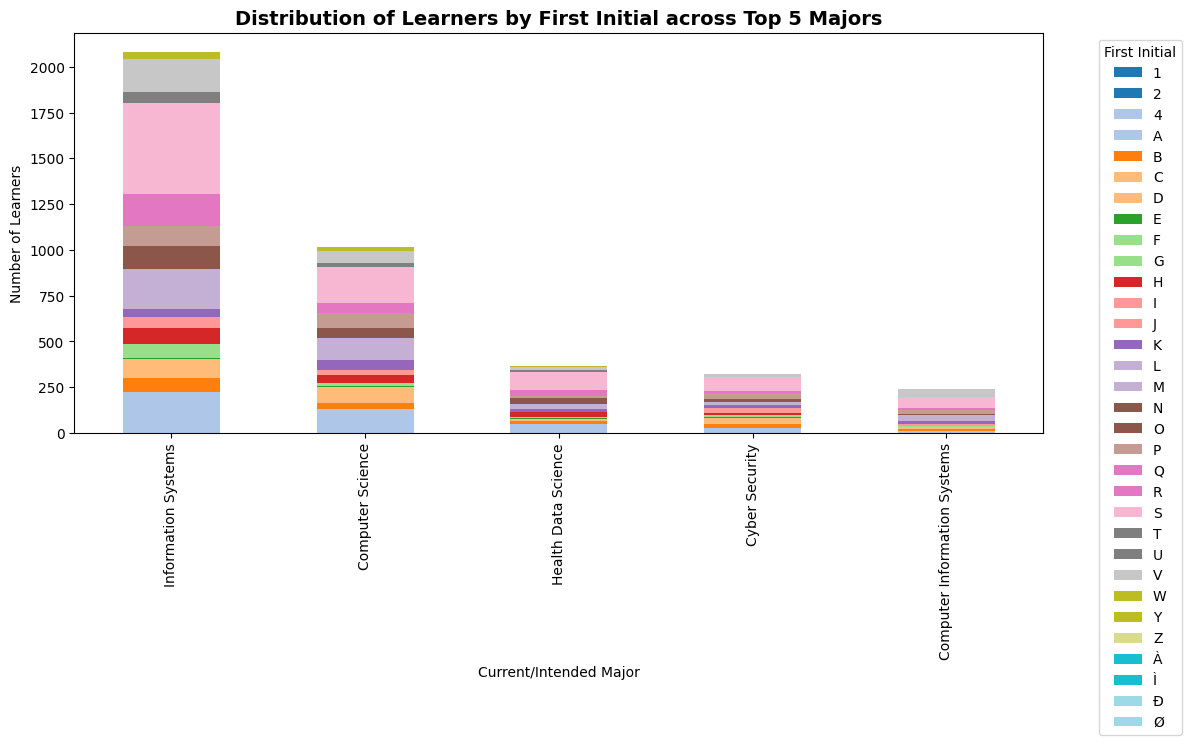

In [11]:
# Add first letter of name
df['First_Initial'] = df['First Name'].astype(str).str[0].str.upper()

# Count frequency: Major vs First Initial
major_initial_counts = df.groupby(['Current/Intended Major', 'First_Initial']).size().unstack(fill_value=0)

# Take top 5 majors for clarity
top_majors = df['Current/Intended Major'].value_counts().head(5).index
subset = major_initial_counts.loc[top_majors]

# Plot stacked bar chart
subset.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')
plt.title("Distribution of Learners by First Initial across Top 5 Majors", fontsize=14, fontweight='bold')
plt.xlabel("Current/Intended Major")
plt.ylabel("Number of Learners")
plt.legend(title="First Initial", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\sumai\AppData\Local\Temp\ipykernel_16324\2525204138.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




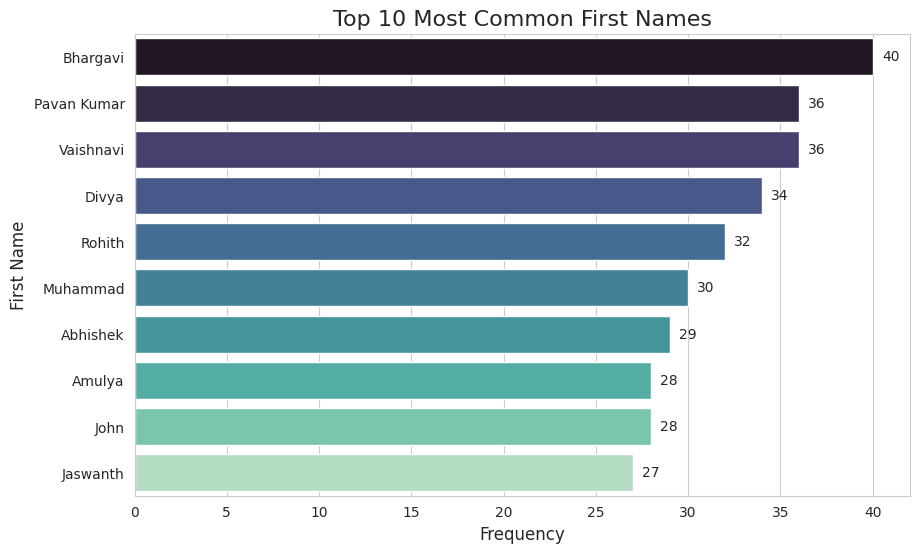

In [24]:
# Top 10 most common first names
top_names = df['First Name'].value_counts().head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_names.values, y=top_names.index, palette="mako")
plt.title("Top 10 Most Common First Names", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("First Name", fontsize=12)

# Add counts on bars
for i, val in enumerate(top_names.values):
    ax.text(val + 0.5, i, str(val), va='center', ha='left', fontsize=10)

plt.show()

<Figure size 1400x700 with 0 Axes>

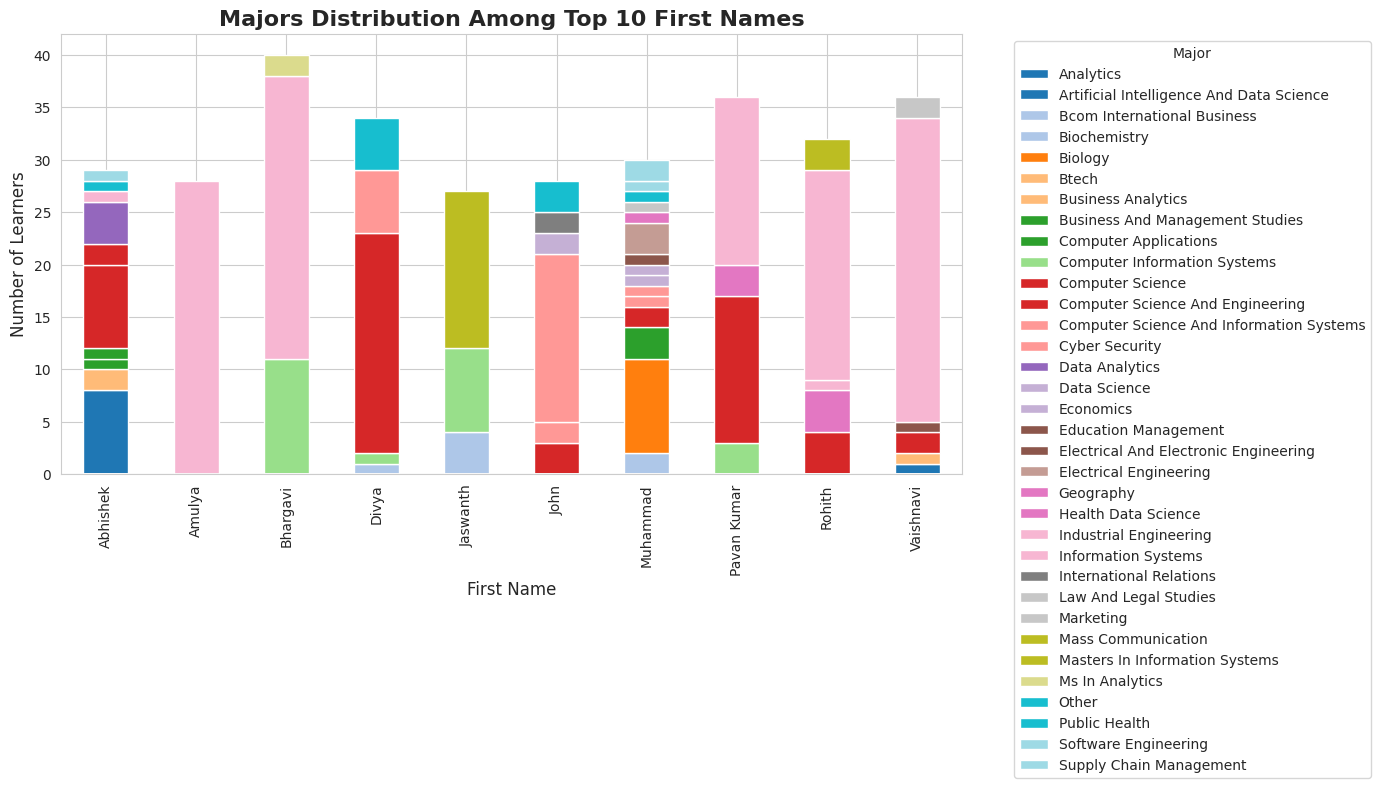

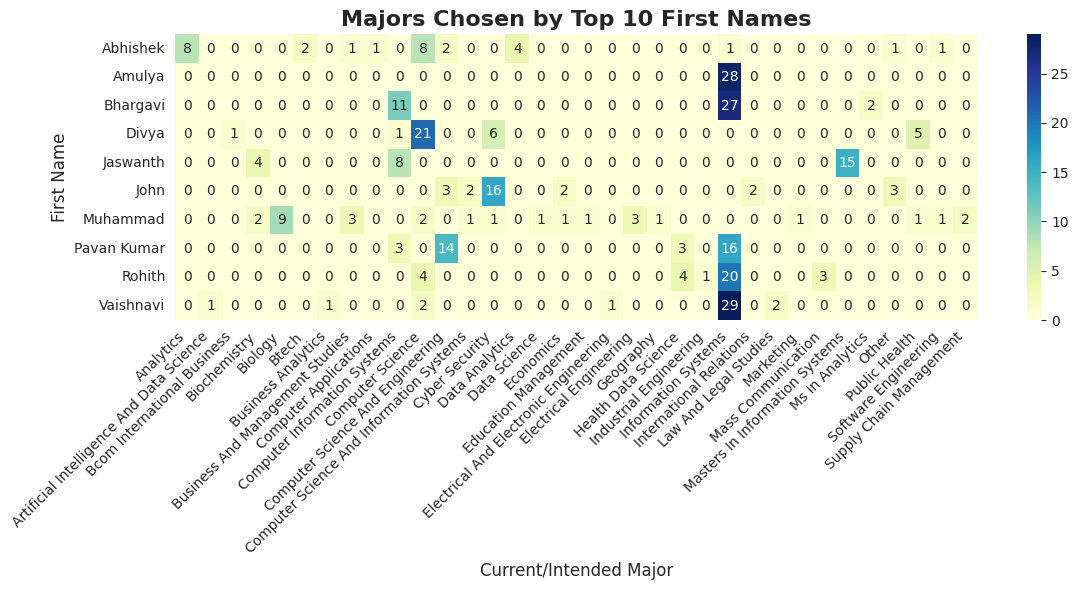

In [ ]:
# =====================================================================
# 📊 First Name vs Major Analysis
# =====================================================================

# Ensure clean font/style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# 1. Get Top 10 First Names
top_names = df['First Name'].value_counts().head(10).index

# 2. Filter dataset for those names
filtered = df[df['First Name'].isin(top_names)]

# 3. Cross-tab: First Name vs Current/Intended Major
name_major = pd.crosstab(filtered['First Name'], filtered['Current/Intended Major'])

# =====================================================================
# 🔹 Visualization 1: Stacked Bar Chart
# =====================================================================
plt.figure(figsize=(14,7))
name_major.plot(kind='bar', stacked=True, figsize=(14,7), colormap='tab20')

plt.title("Majors Distribution Among Top 10 First Names", fontsize=16, fontweight='bold')
plt.xlabel("First Name", fontsize=12)
plt.ylabel("Number of Learners", fontsize=12)
plt.legend(title="Major", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# =====================================================================
# 🔹 Visualization 2: Heatmap
# =====================================================================
plt.figure(figsize=(12,6))
sns.heatmap(name_major, cmap="YlGnBu", annot=True, fmt="d")

plt.title("Majors Chosen by Top 10 First Names", fontsize=16, fontweight='bold')
plt.xlabel("Current/Intended Major", fontsize=12)
plt.ylabel("First Name", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Learners by Age Group - Bar Chart

C:\Users\sumai\AppData\Local\Temp\ipykernel_19868\1744699791.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Age Group', palette='viridis', order=labels)


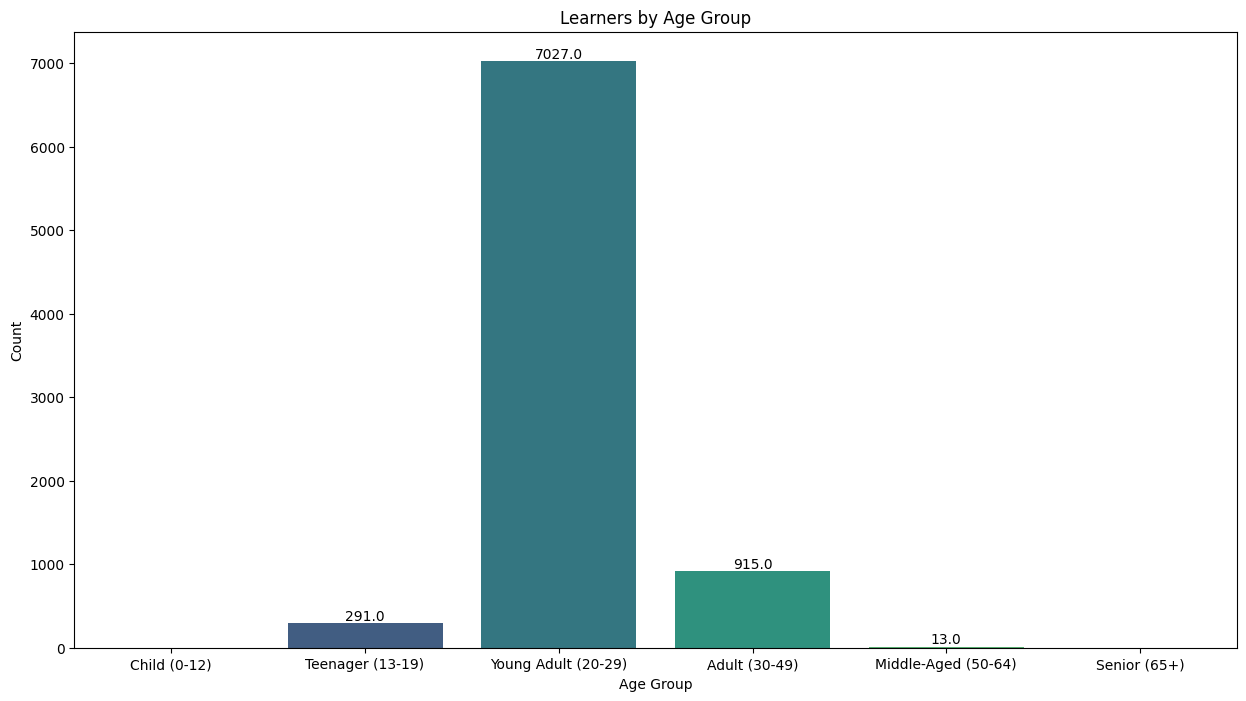

In [88]:
# Define meaningful age categories
bins = [0, 12, 19, 29, 49, 64, 120]
labels = ['Child (0-12)', 'Teenager (13-19)', 'Young Adult (20-29)', 
          'Adult (30-49)', 'Middle-Aged (50-64)', 'Senior (65+)']

df['Age Group'] = pd.cut(df['Age '], bins=bins, labels=labels, right=True)

# Plot count of each age group
plt.figure(figsize=(15,8))
ax = sns.countplot(data=df, x='Age Group', palette='viridis', order=labels)
plt.title("Learners by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

# Annotate counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', xy=(p.get_x() + p.get_width()/2, height), 
                ha='center', va='bottom')

plt.show()

Bar chart → counts per week day 

C:\Users\sumai\AppData\Local\Temp\ipykernel_19868\1423783641.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_counts.index, y=weekly_counts.values, palette='viridis')


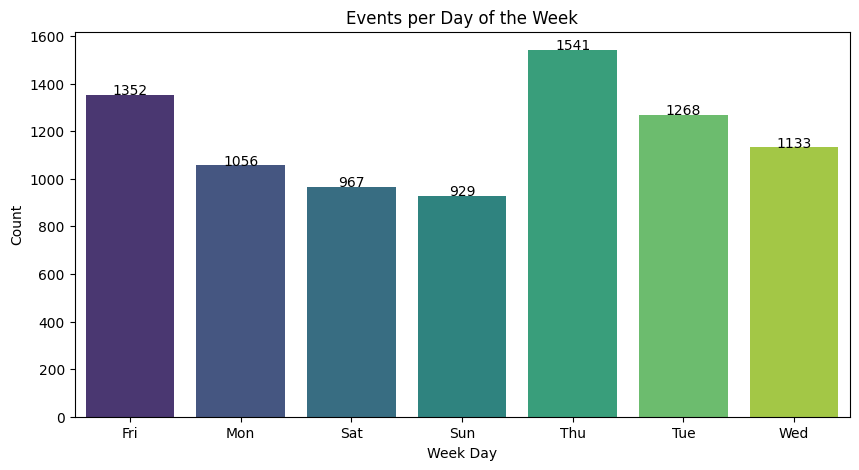

In [89]:
# Count of events per week day
weekly_counts = df['Weekly Patterns'].value_counts().sort_index()  # assuming Monday=0 ... Sunday=6

plt.figure(figsize=(10,5))
sns.barplot(x=weekly_counts.index, y=weekly_counts.values, palette='viridis')
plt.title("Events per Day of the Week")
plt.xlabel("Week Day")
plt.ylabel("Count")

# Annotate counts
for i, val in enumerate(weekly_counts.values):
    plt.text(i, val+1, str(val), ha='center')

plt.show()

Bar chart → counts per season

C:\Users\sumai\AppData\Local\Temp\ipykernel_19868\471015710.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')


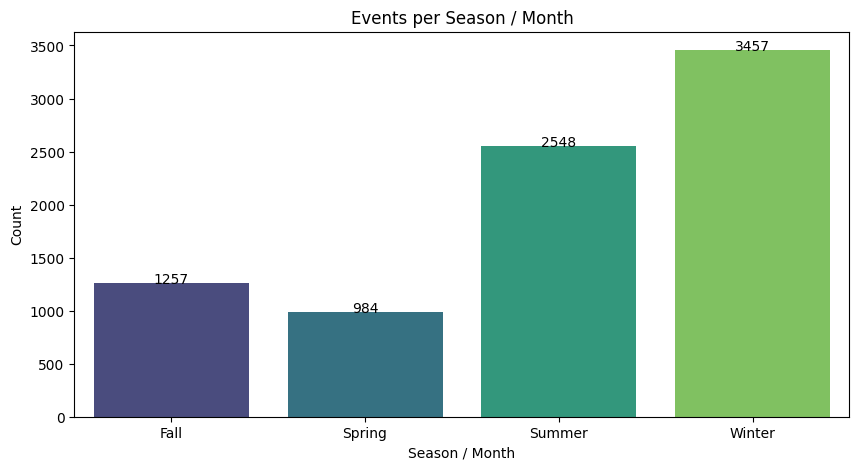

In [90]:
# Count per season/month
season_counts = df['Seasonal Patterns'].value_counts().sort_index()  # e.g., Jan-Dec or Winter, Spring, Summer, Autumn

plt.figure(figsize=(10,5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
plt.title("Events per Season / Month")
plt.xlabel("Season / Month")
plt.ylabel("Count")

# Annotate counts
for i, val in enumerate(season_counts.values):
    plt.text(i, val+1, str(val), ha='center')

plt.show()

Heatmap → combined view of week × season/month for detailed pattern spotting

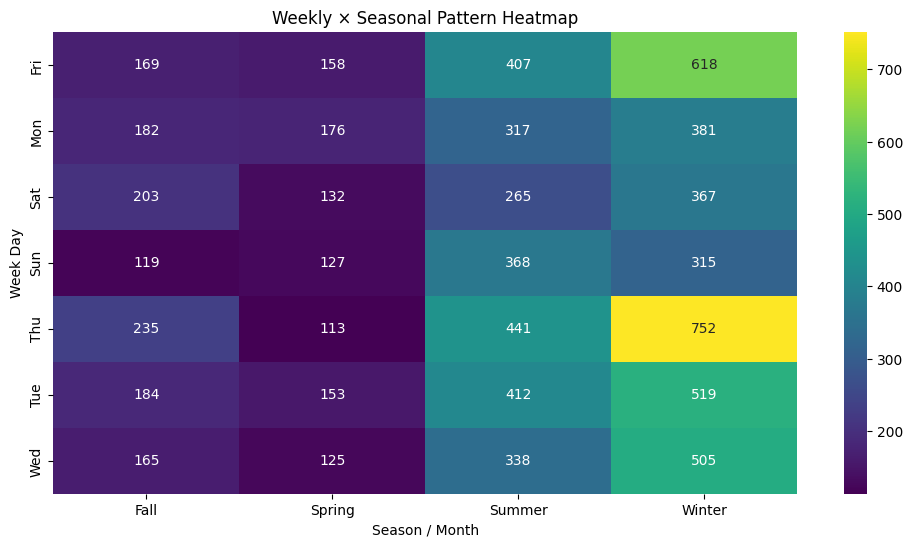

In [91]:
# Create a pivot table: index=Weekday, columns=Season/Month, values=counts
pivot = df.pivot_table(index='Weekly Patterns', columns='Seasonal Patterns', aggfunc='size', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='viridis')
plt.title("Weekly × Seasonal Pattern Heatmap")
plt.ylabel("Week Day")
plt.xlabel("Season / Month")
plt.show()


Creating Pairplot... (this may take a moment)


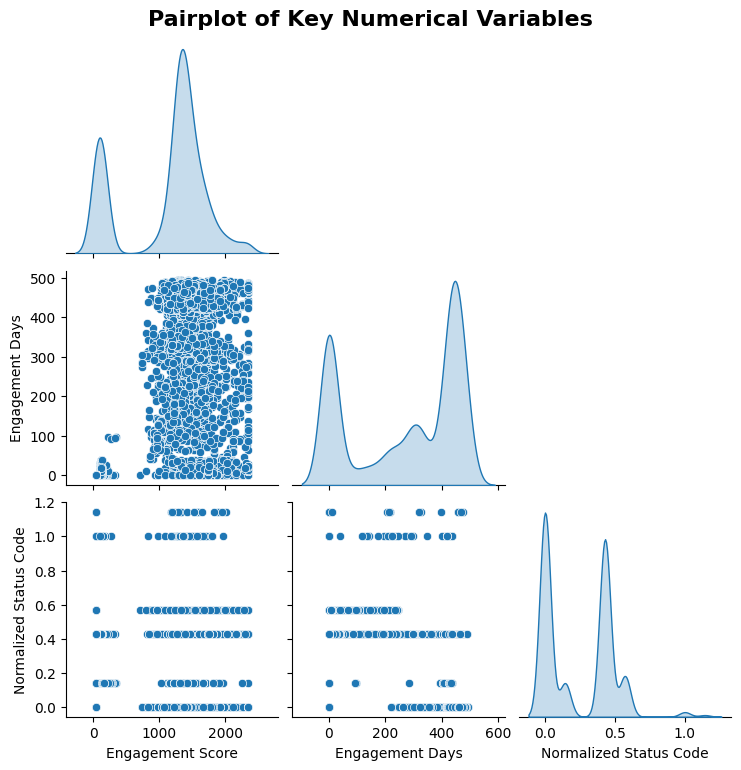

C:\Users\sumai\AppData\Local\Temp\ipykernel_25152\2554697815.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status Description', y='Engagement Score', data=df, palette='Set2')


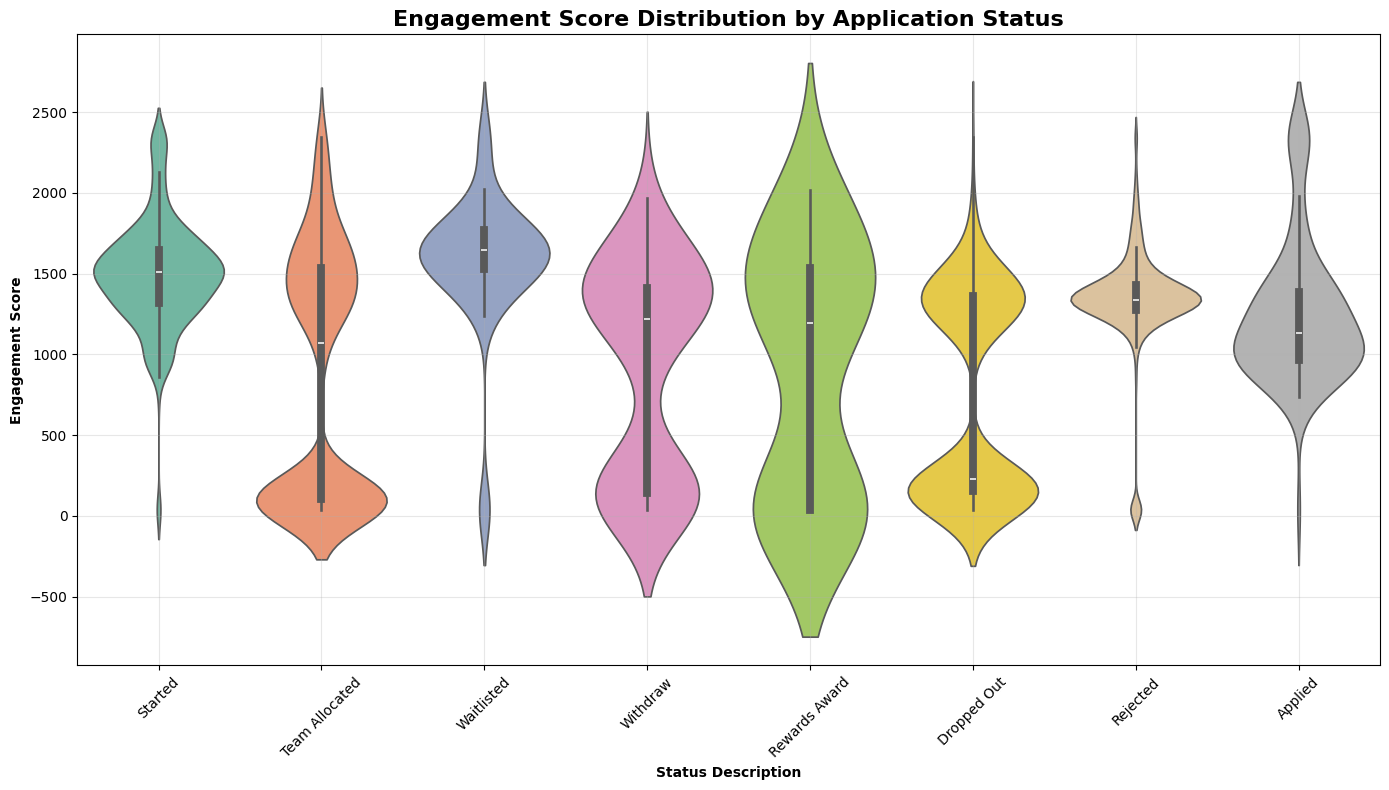

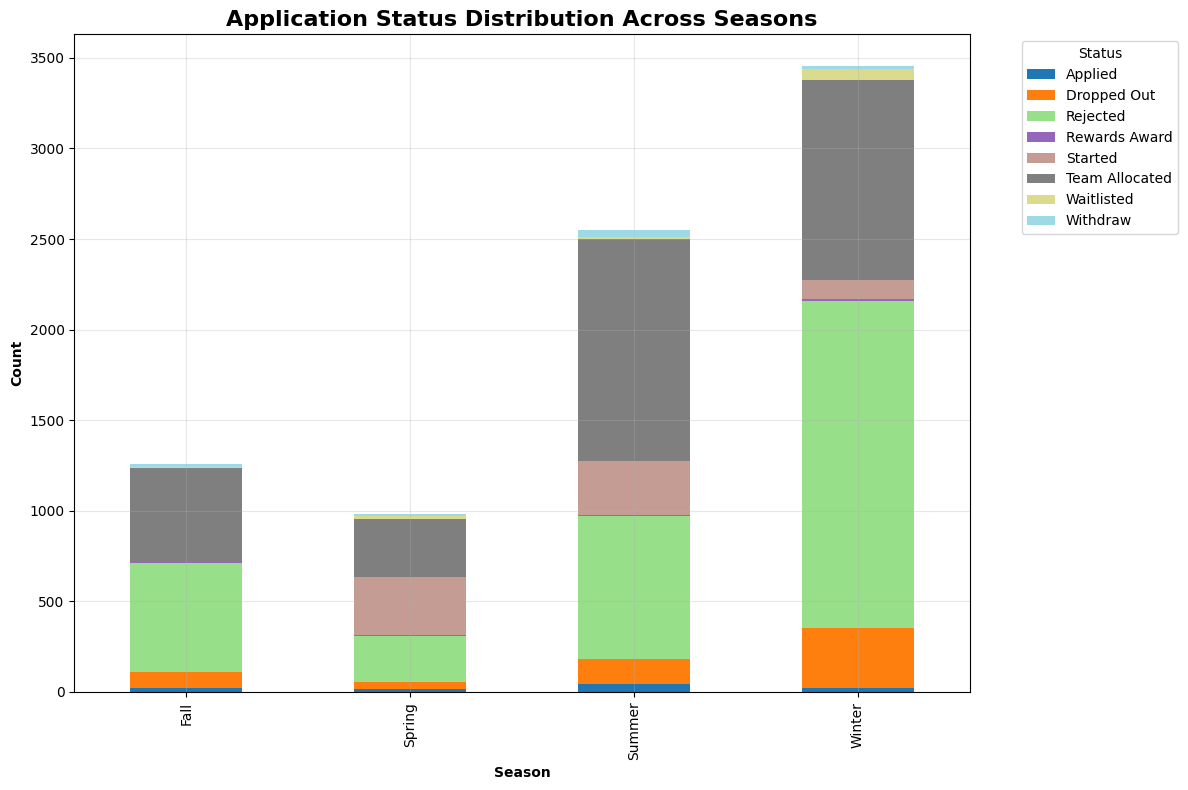

In [8]:
# -----------------------------
# 1. Pairplot for key numerical variables
# -----------------------------
numerical_cols = ['Age', 'Engagement Score', 'Engagement Days', 'Normalized Status Code']
pairplot_cols = [col for col in numerical_cols if col in df.columns]

if len(pairplot_cols) > 1:
    print("Creating Pairplot... (this may take a moment)")
    sns.pairplot(df[pairplot_cols], diag_kind='kde', corner=True)
    plt.suptitle('Pairplot of Key Numerical Variables', y=1.02, fontsize=16, fontweight='bold')
    plt.show()
else:
    print("Not enough numerical columns available for Pairplot.")

# -----------------------------
# 2. Violin Plots: Engagement Score by Status
# -----------------------------
if 'Engagement Score' in df.columns and 'Status Description' in df.columns:
    plt.figure(figsize=(14, 8))
    sns.violinplot(x='Status Description', y='Engagement Score', data=df, palette='Set2')
    plt.title('Engagement Score Distribution by Application Status', fontsize=16, fontweight='bold')
    plt.xlabel('Status Description', fontweight='bold')
    plt.ylabel('Engagement Score', fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not available for Violin Plot.")

# -----------------------------
# 3. Stacked Bar Chart: Status by Season
# -----------------------------
if 'Seasonal Patterns' in df.columns and 'Status Description' in df.columns:
    status_season = pd.crosstab(df['Seasonal Patterns'], df['Status Description'])
    status_season.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
    plt.title('Application Status Distribution Across Seasons', fontsize=16, fontweight='bold')
    plt.xlabel('Season', fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not available for Stacked Bar Chart.")


Age: 470 outliers (5.70%)
Engagement Score: 0 outliers (0.00%)
Engagement Days: 0 outliers (0.00%)


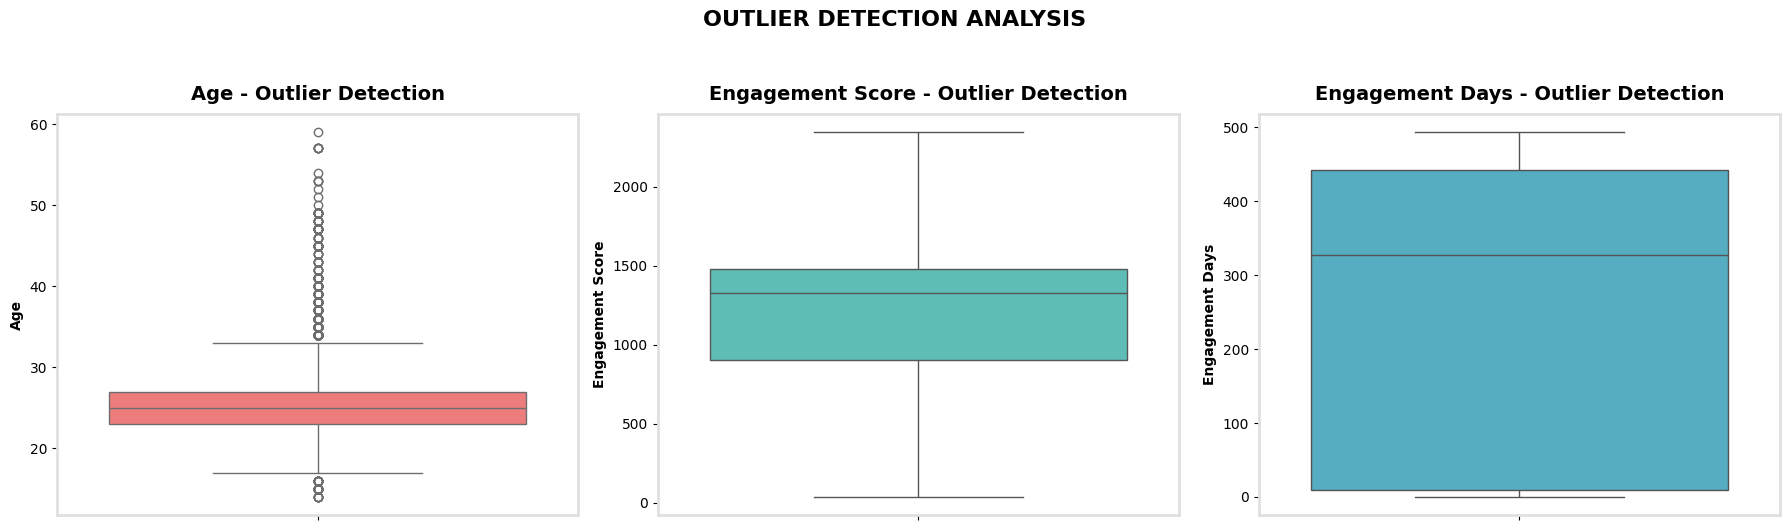

In [41]:
# OUTLIER DETECTION AND ANALYSIS - With Borders
# Detect outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Check for outliers in key numerical columns
outlier_analysis = {}
for col in ['Age', 'Engagement Score', 'Engagement Days']:
    outliers = detect_outliers_iqr(df[col])
    outlier_analysis[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100,
        'values': outliers.values
    }
    print(f"{col}: {outlier_analysis[col]['count']} outliers ({outlier_analysis[col]['percentage']:.2f}%)")

# Visualize outliers with borders
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('OUTLIER DETECTION ANALYSIS', fontsize=16, fontweight='bold', y=1.05)

# Plot 1: Age Outliers
ax1 = axes[0]
sns.boxplot(y=df['Age'], ax=ax1, color='#ff6b6b')
ax1.set_title('Age - Outlier Detection', fontsize=14, fontweight='bold', pad=10)
ax1.set_ylabel('Age', fontweight='bold')
# Add border to Age plot
for spine in ax1.spines.values():
    spine.set_edgecolor('#e0e0e0')
    spine.set_linewidth(2)

# Plot 2: Engagement Score Outliers
ax2 = axes[1]
sns.boxplot(y=df['Engagement Score'], ax=ax2, color='#4ecdc4')
ax2.set_title('Engagement Score - Outlier Detection', fontsize=14, fontweight='bold', pad=10)
ax2.set_ylabel('Engagement Score', fontweight='bold')
# Add border to Engagement Score plot
for spine in ax2.spines.values():
    spine.set_edgecolor('#e0e0e0')
    spine.set_linewidth(2)

# Plot 3: Engagement Days Outliers
ax3 = axes[2]
sns.boxplot(y=df['Engagement Days'], ax=ax3, color='#45b7d1')
ax3.set_title('Engagement Days - Outlier Detection', fontsize=14, fontweight='bold', pad=10)
ax3.set_ylabel('Engagement Days', fontweight='bold')
# Add border to Engagement Days plot
for spine in ax3.spines.values():
    spine.set_edgecolor('#e0e0e0')
    spine.set_linewidth(2)

plt.tight_layout()
plt.show()

A box plot with mean/median/mode overlay of Status Code

Mean: 1052.1865146737812
Median: 1050.0
Mode: 1030


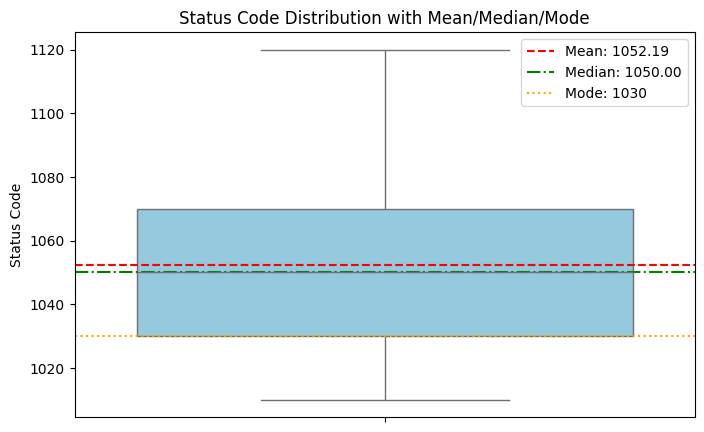

In [95]:
# Calculate statistics
mean_status = df['Status Code'].mean()
median_status = df['Status Code'].median()
mode_status = df['Status Code'].mode()[0]

print(f"Mean: {mean_status}")
print(f"Median: {median_status}")
print(f"Mode: {mode_status}")

# Boxplot to visualize distribution and outliers
plt.figure(figsize=(8,5))
sns.boxplot(y=df['Status Code'], color='skyblue')
plt.title("Status Code Distribution with Mean/Median/Mode")

# Overlay mean, median, mode
plt.axhline(mean_status, color='red', linestyle='--', label=f'Mean: {mean_status:.2f}')
plt.axhline(median_status, color='green', linestyle='-.', label=f'Median: {median_status:.2f}')
plt.axhline(mode_status, color='orange', linestyle=':', label=f'Mode: {mode_status:.0f}')

plt.ylabel("Status Code")
plt.legend()
plt.show()

Average Engagement Score by Season

C:\Users\sumai\AppData\Local\Temp\ipykernel_5740\305243812.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\sumai\AppData\Local\Temp\ipykernel_5740\305243812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


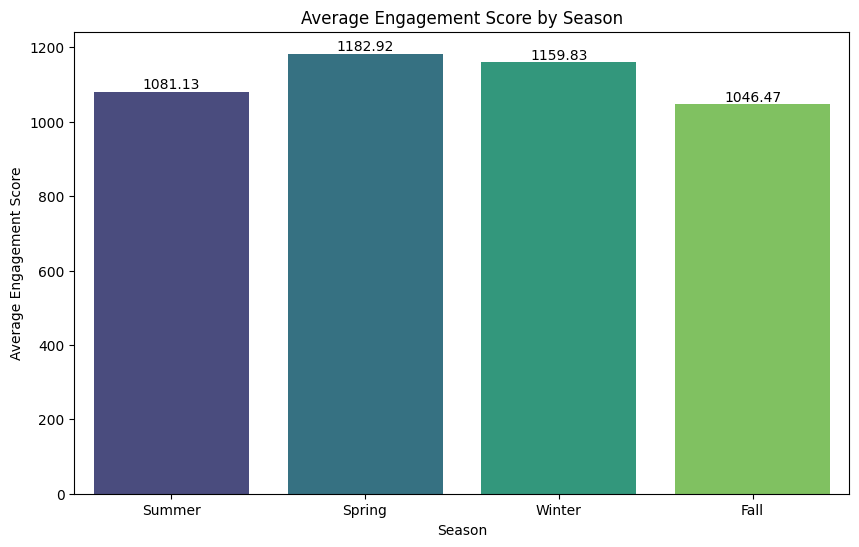

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='Seasonal Patterns',
    y='Engagement Score',
    palette='viridis',
    ci=None  
)
plt.title("Average Engagement Score by Season")
plt.xlabel("Season")
plt.ylabel("Average Engagement Score")

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom')

plt.show()

Engagement Score by Weekly Patterns

C:\Users\sumai\AppData\Local\Temp\ipykernel_5740\2325555488.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\sumai\AppData\Local\Temp\ipykernel_5740\2325555488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


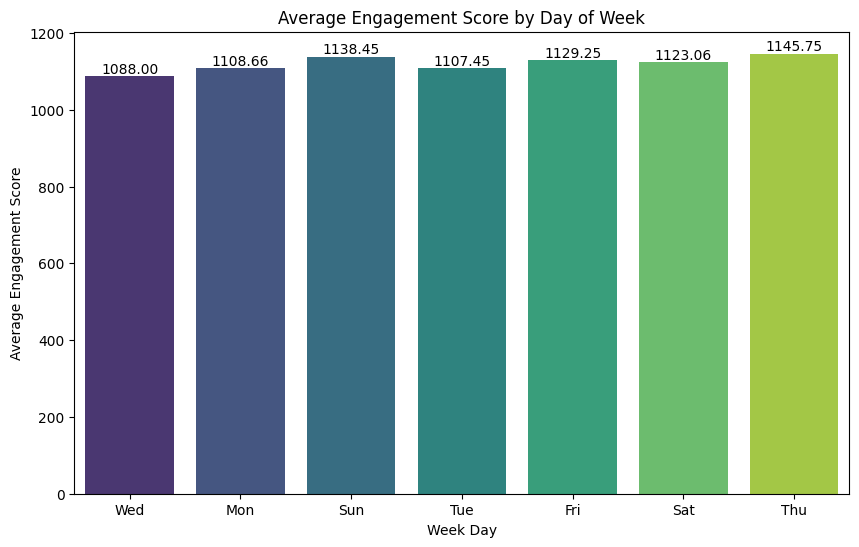

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='Weekly Patterns',
    y='Engagement Score',
    palette='viridis',
    ci=None
)
plt.title("Average Engagement Score by Day of Week")
plt.xlabel("Week Day")
plt.ylabel("Average Engagement Score")

# Annotate mean values
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom')

plt.show()


Trends Analysis

C:\Users\sumai\AppData\Local\Temp\ipykernel_5740\1412208359.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_engagement = df.groupby('Age_Group')['Engagement Score'].mean()


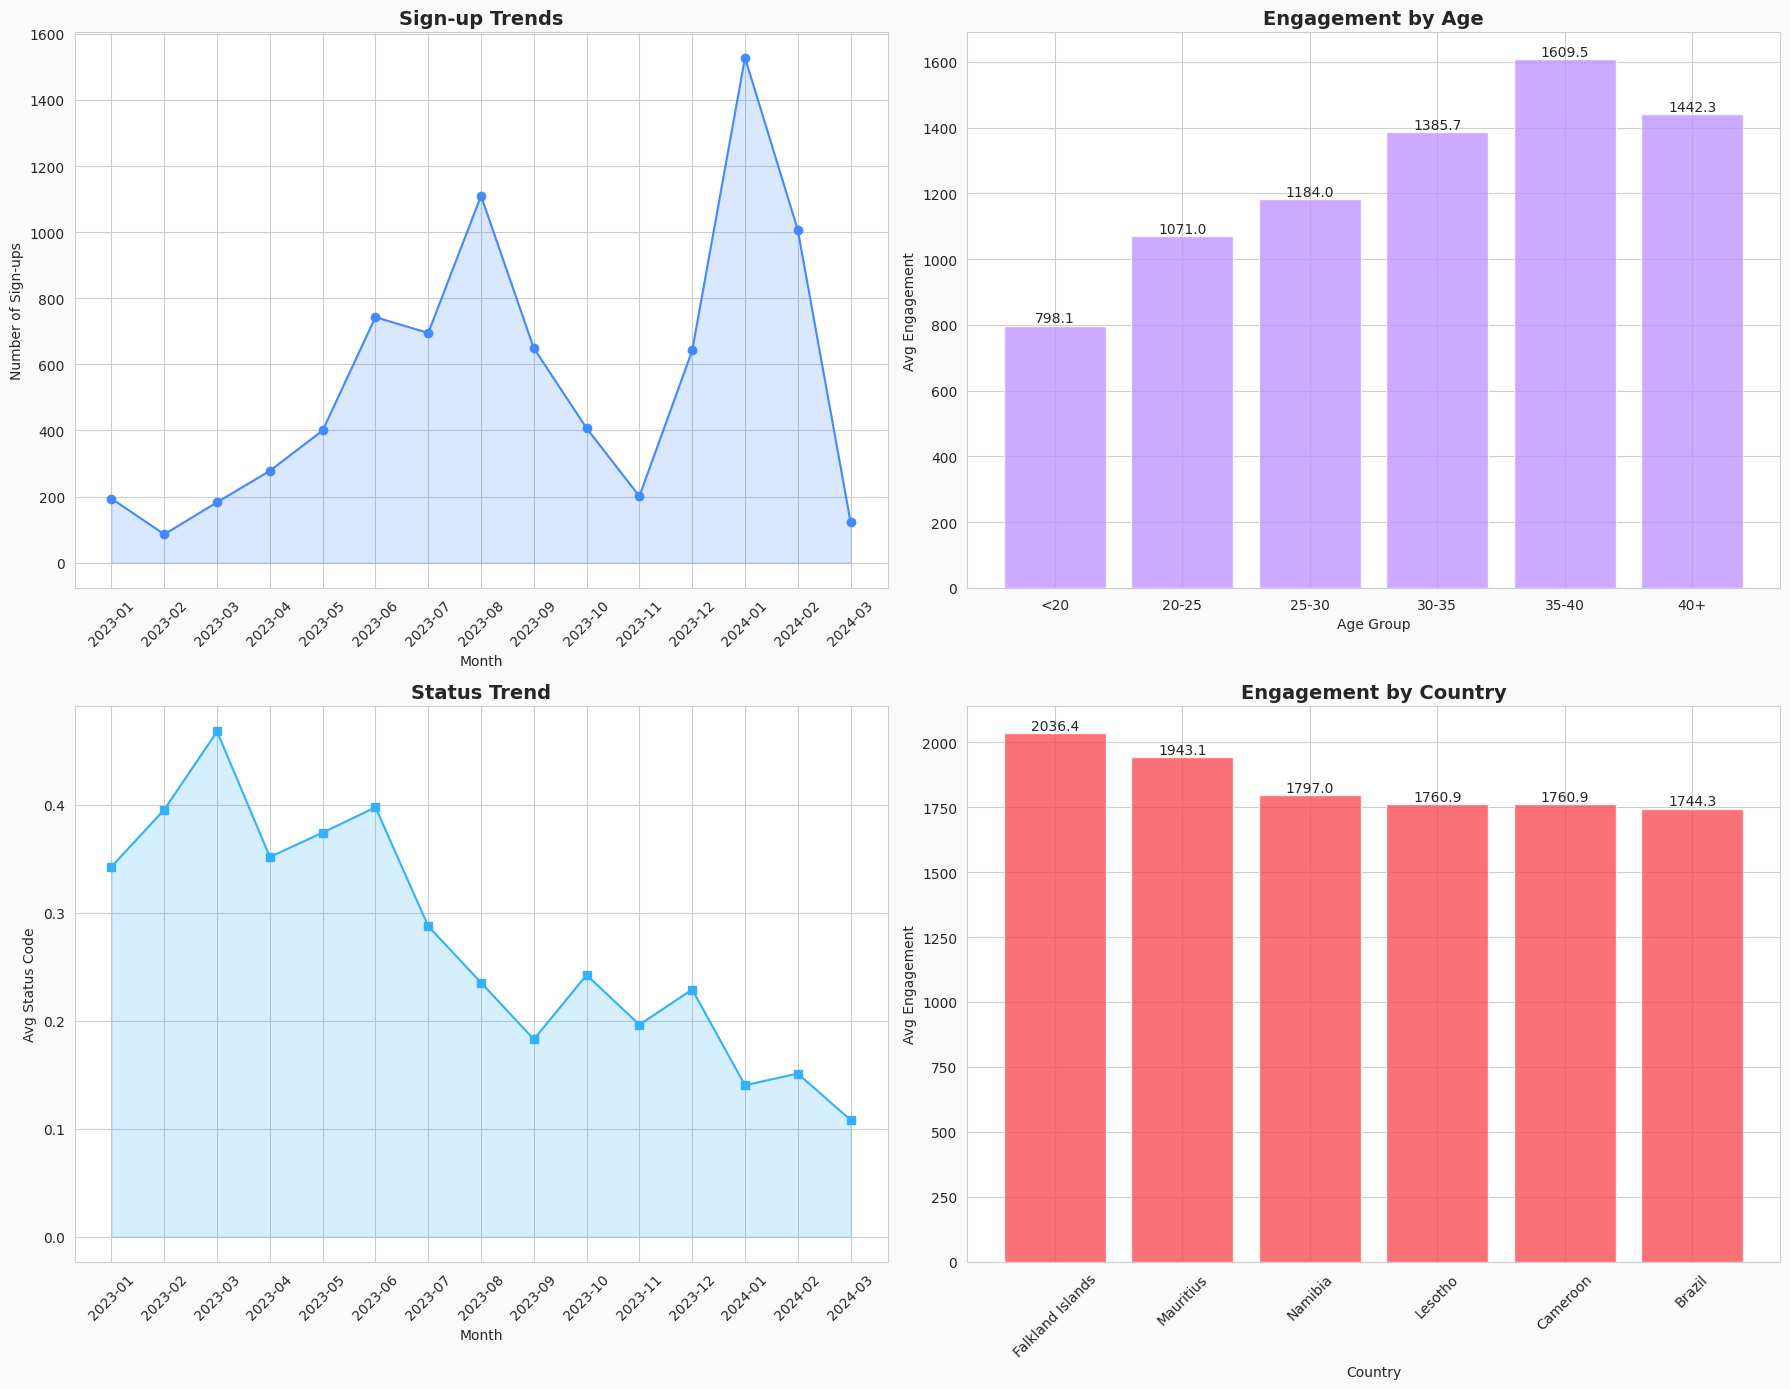


📈 TREND ANALYSIS AND PATTERN IDENTIFICATION
• Monthly sign-ups trend: -36.6% change over 15 months
• Highest engagement age group: 35-40 (1609.5)
• Top 3 countries by engagement:
   - Falkland Islands: 2036.4
   - Mauritius: 1943.1
   - Namibia: 1797.0


In [23]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Convert dates
if 'Learner SignUp DateTime' in df.columns:
    df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'])
    df['SignUp_Month'] = df['Learner SignUp DateTime'].dt.to_period('M')

# Define color palettes
colors = {
    'blue': '#4589ff',
    'purple': '#be95ff',
    'turquoise': '#33b1ff',
    'yellow': '#fa4d56'
}

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.patch.set_facecolor('#fafafa')

# ------------------ Plot 1: Monthly Sign-ups ------------------
ax1 = axes[0,0]
if 'SignUp_Month' in df.columns:
    monthly_trends = df['SignUp_Month'].value_counts().sort_index()
    ax1.plot(monthly_trends.index.astype(str), monthly_trends.values, marker='o', color=colors['blue'])
    ax1.fill_between(monthly_trends.index.astype(str), monthly_trends.values, alpha=0.2, color=colors['blue'])
    ax1.set_title('Sign-up Trends', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Number of Sign-ups')
    ax1.tick_params(axis='x', rotation=45)
else:
    ax1.text(0.5, 0.5, 'No Sign-up Data', ha='center', va='center')

# ------------------ Plot 2: Engagement by Age Group ------------------
ax2 = axes[0,1]
if 'Age ' in df.columns and 'Engagement Score' in df.columns:
    bins = [0, 20, 25, 30, 35, 40, 100]
    labels = ['<20','20-25','25-30','30-35','35-40','40+']
    df['Age_Group'] = pd.cut(df['Age '], bins=bins, labels=labels)
    age_engagement = df.groupby('Age_Group')['Engagement Score'].mean()
    bars = ax2.bar(age_engagement.index, age_engagement.values, color=colors['purple'], alpha=0.8)
    ax2.set_title('Engagement by Age', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Age Group')
    ax2.set_ylabel('Avg Engagement')
    for bar, val in zip(bars, age_engagement.values):
        ax2.text(bar.get_x() + bar.get_width()/2, val+0.5, f'{val:.1f}', ha='center', va='bottom')
else:
    ax2.text(0.5, 0.5, 'No Age/Engagement Data', ha='center', va='center')

# ------------------ Plot 3: Status Trend ------------------
ax3 = axes[1,0]
if 'SignUp_Month' in df.columns and 'Normalized Status Code' in df.columns:
    status_trend = df.groupby('SignUp_Month')['Normalized Status Code'].mean()
    ax3.plot(status_trend.index.astype(str), status_trend.values, marker='s', color=colors['turquoise'])
    ax3.fill_between(status_trend.index.astype(str), status_trend.values, alpha=0.2, color=colors['turquoise'])
    ax3.set_title('Status Trend', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Avg Status Code')
    ax3.tick_params(axis='x', rotation=45)
else:
    ax3.text(0.5, 0.5, 'No Status Data', ha='center', va='center')

# ------------------ Plot 4: Engagement by Top Countries ------------------
ax4 = axes[1,1]
if 'Country' in df.columns and 'Engagement Score' in df.columns:
    top_countries = df.groupby('Country')['Engagement Score'].mean().sort_values(ascending=False).head(6)
    bars = ax4.bar(top_countries.index, top_countries.values, color=colors['yellow'], alpha=0.8)
    ax4.set_title('Engagement by Country', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Country')
    ax4.set_ylabel('Avg Engagement')
    ax4.tick_params(axis='x', rotation=45)
    for bar, val in zip(bars, top_countries.values):
        ax4.text(bar.get_x() + bar.get_width()/2, val+0.5, f'{val:.1f}', ha='center', va='bottom')
else:
    ax4.text(0.5, 0.5, 'No Country/Engagement Data', ha='center', va='center')

# Layout adjustments
plt.tight_layout()
plt.show()

# ------------------ Trend Insights ------------------
print("\n📈 TREND ANALYSIS AND PATTERN IDENTIFICATION")
print("="*60)

# Sign-up trend
if 'SignUp_Month' in df.columns:
    monthly_trends = df['SignUp_Month'].value_counts().sort_index()
    trend_change = ((monthly_trends.iloc[-1] - monthly_trends.iloc[0]) / monthly_trends.iloc[0]) * 100
    print(f"• Monthly sign-ups trend: {trend_change:+.1f}% change over {len(monthly_trends)} months")

# Best Age Group by Engagement
if 'Age_Group' in df.columns:
    best_age_group = age_engagement.idxmax()
    print(f"• Highest engagement age group: {best_age_group} ({age_engagement.max():.1f})")

# Top 3 countries by engagement
if 'Country' in df.columns and 'Engagement Score' in df.columns:
    top3 = top_countries.head(3)
    print("• Top 3 countries by engagement:")
    for c, s in top3.items():
        print(f"   - {c}: {s:.1f}")


TREND ANALYSIS AND PATTERN IDENTIFICATION (extracted from above code)

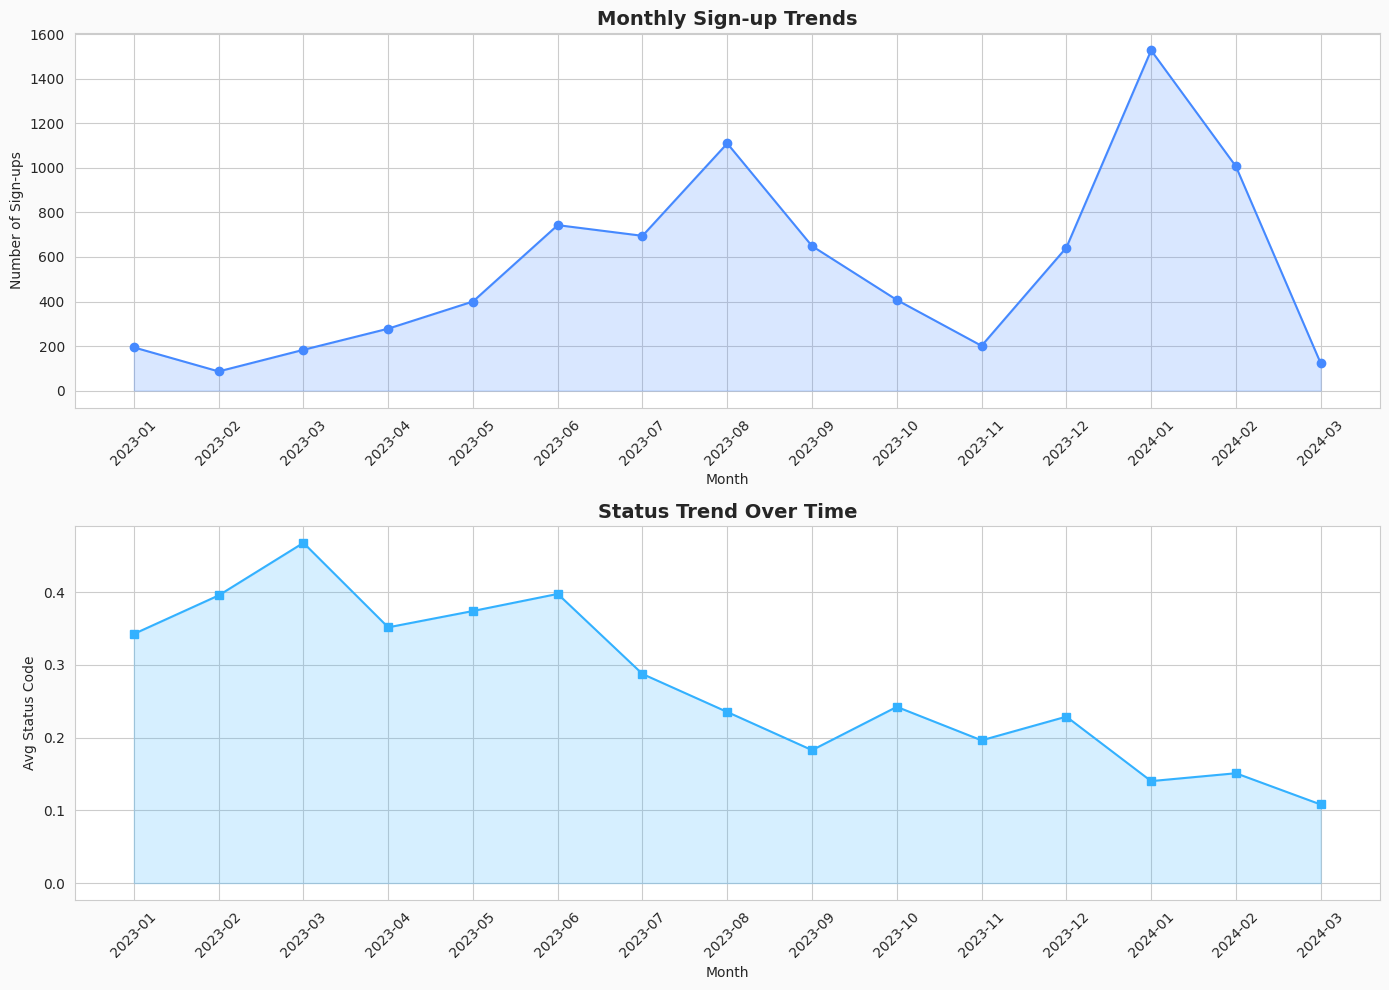

In [46]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Convert dates
if 'Learner SignUp DateTime' in df.columns:
    df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'])
    df['SignUp_Month'] = df['Learner SignUp DateTime'].dt.to_period('M')

# Define color palette
colors = {
    'blue': '#4589ff',
    'turquoise': '#33b1ff'
}

# Create figure
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.patch.set_facecolor('#fafafa')

# ------------------ Plot 1: Monthly Sign-ups ------------------
ax1 = axes[0]
if 'SignUp_Month' in df.columns:
    monthly_trends = df['SignUp_Month'].value_counts().sort_index()
    ax1.plot(monthly_trends.index.astype(str), monthly_trends.values, marker='o', color=colors['blue'])
    ax1.fill_between(monthly_trends.index.astype(str), monthly_trends.values, alpha=0.2, color=colors['blue'])
    ax1.set_title('Monthly Sign-up Trends', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Number of Sign-ups')
    ax1.tick_params(axis='x', rotation=45)
else:
    ax1.text(0.5, 0.5, 'No Sign-up Data', ha='center', va='center')

# ------------------ Plot 2: Status Trend ------------------
ax2 = axes[1]
if 'SignUp_Month' in df.columns and 'Normalized Status Code' in df.columns:
    status_trend = df.groupby('SignUp_Month')['Normalized Status Code'].mean()
    ax2.plot(status_trend.index.astype(str), status_trend.values, marker='s', color=colors['turquoise'])
    ax2.fill_between(status_trend.index.astype(str), status_trend.values, alpha=0.2, color=colors['turquoise'])
    ax2.set_title('Status Trend Over Time', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Avg Status Code')
    ax2.tick_params(axis='x', rotation=45)
else:
    ax2.text(0.5, 0.5, 'No Status Data', ha='center', va='center')

plt.tight_layout()
plt.show()


C:\Users\sumai\AppData\Local\Temp\ipykernel_8880\1408662261.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_engagement = df.groupby('Age_Group')['Engagement Score'].mean()


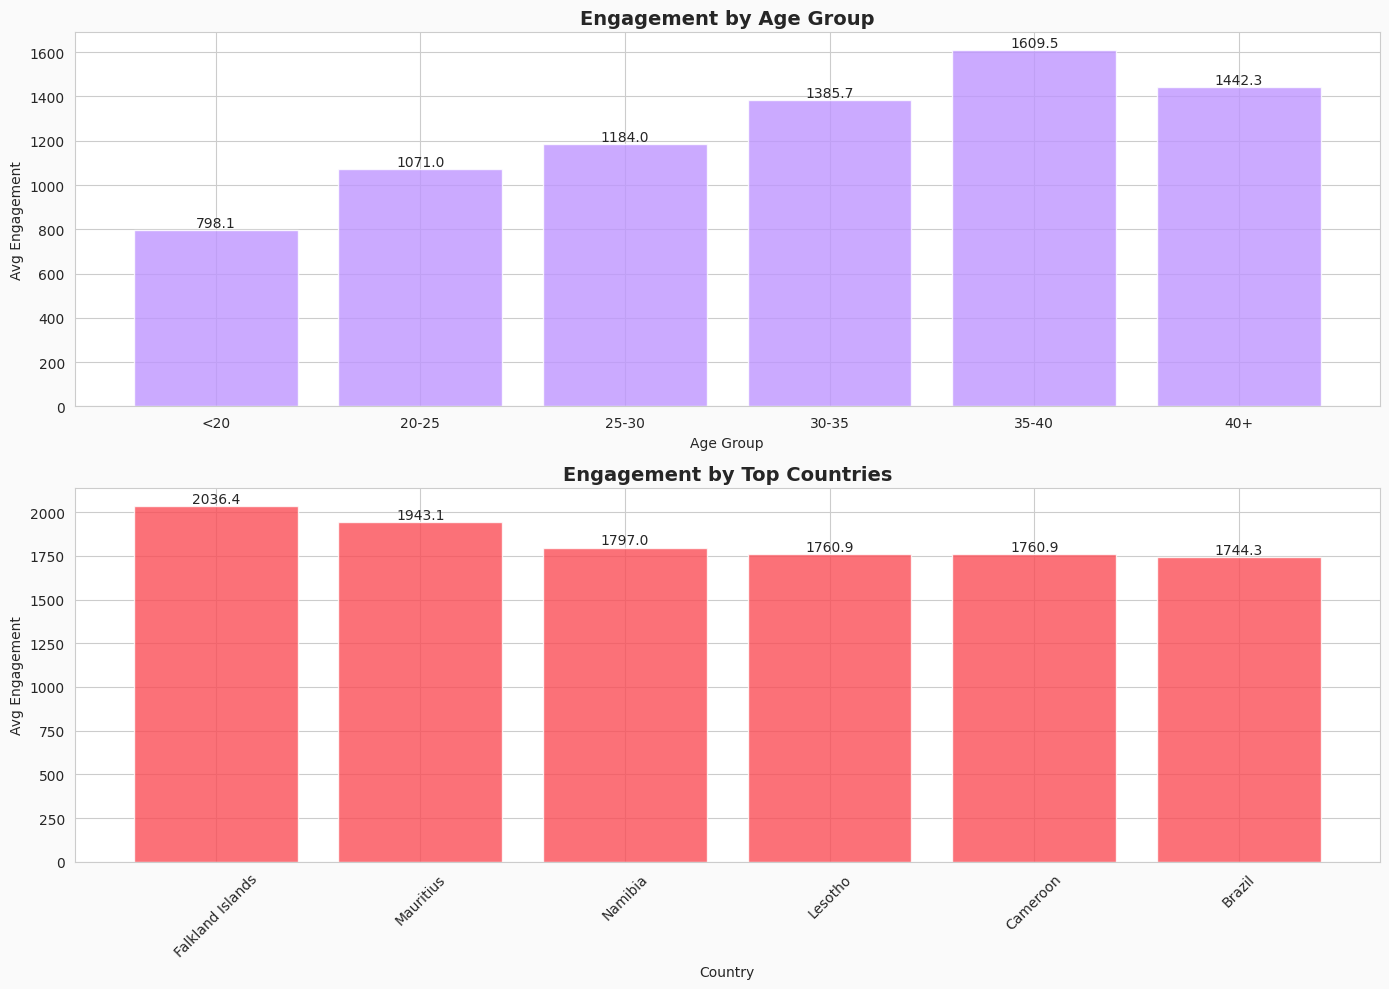

In [47]:
# Define color palette
colors = {
    'purple': '#be95ff',
    'yellow': '#fa4d56'
}

# Create figure
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.patch.set_facecolor('#fafafa')

# ------------------ Plot 1: Engagement by Age Group ------------------
ax1 = axes[0]
if 'Age ' in df.columns and 'Engagement Score' in df.columns:
    bins = [0, 20, 25, 30, 35, 40, 100]
    labels = ['<20','20-25','25-30','30-35','35-40','40+']
    df['Age_Group'] = pd.cut(df['Age '], bins=bins, labels=labels)
    age_engagement = df.groupby('Age_Group')['Engagement Score'].mean()
    bars = ax1.bar(age_engagement.index, age_engagement.values, color=colors['purple'], alpha=0.8)
    ax1.set_title('Engagement by Age Group', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Age Group')
    ax1.set_ylabel('Avg Engagement')
    for bar, val in zip(bars, age_engagement.values):
        ax1.text(bar.get_x() + bar.get_width()/2, val+0.5, f'{val:.1f}', ha='center', va='bottom')
else:
    ax1.text(0.5, 0.5, 'No Age/Engagement Data', ha='center', va='center')

# ------------------ Plot 2: Engagement by Top Countries ------------------
ax2 = axes[1]
if 'Country' in df.columns and 'Engagement Score' in df.columns:
    top_countries = df.groupby('Country')['Engagement Score'].mean().sort_values(ascending=False).head(6)
    bars = ax2.bar(top_countries.index, top_countries.values, color=colors['yellow'], alpha=0.8)
    ax2.set_title('Engagement by Top Countries', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Country')
    ax2.set_ylabel('Avg Engagement')
    ax2.tick_params(axis='x', rotation=45)
    for bar, val in zip(bars, top_countries.values):
        ax2.text(bar.get_x() + bar.get_width()/2, val+0.5, f'{val:.1f}', ha='center', va='bottom')
else:
    ax2.text(0.5, 0.5, 'No Country/Engagement Data', ha='center', va='center')

plt.tight_layout()
plt.show()


In [34]:
date_cols = ['Learner SignUp DateTime', 'Opportunity Start Date', 'Opportunity End Date', 'Apply Date']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

data = pd.DataFrame()
for col in date_cols:
    if col in df.columns:
        counts = df[col].value_counts().sort_index()
        temp = pd.DataFrame({ 'Date': counts.index, 'Count': counts.values, 'Type': col })
        data = pd.concat([data, temp], ignore_index=True)

fig = px.line(
    data, 
    x='Date', 
    y='Count', 
    color='Type', 
    markers=True,
    title='Applications & Opportunities Trend Over Time',
    labels={'Count':'Number of Events', 'Date':'Date', 'Type':'Event Type'}
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Count",
    legend_title="Event Type",
    template="plotly_white",
    hovermode="x unified"
)

fig.show()


Completion Trends

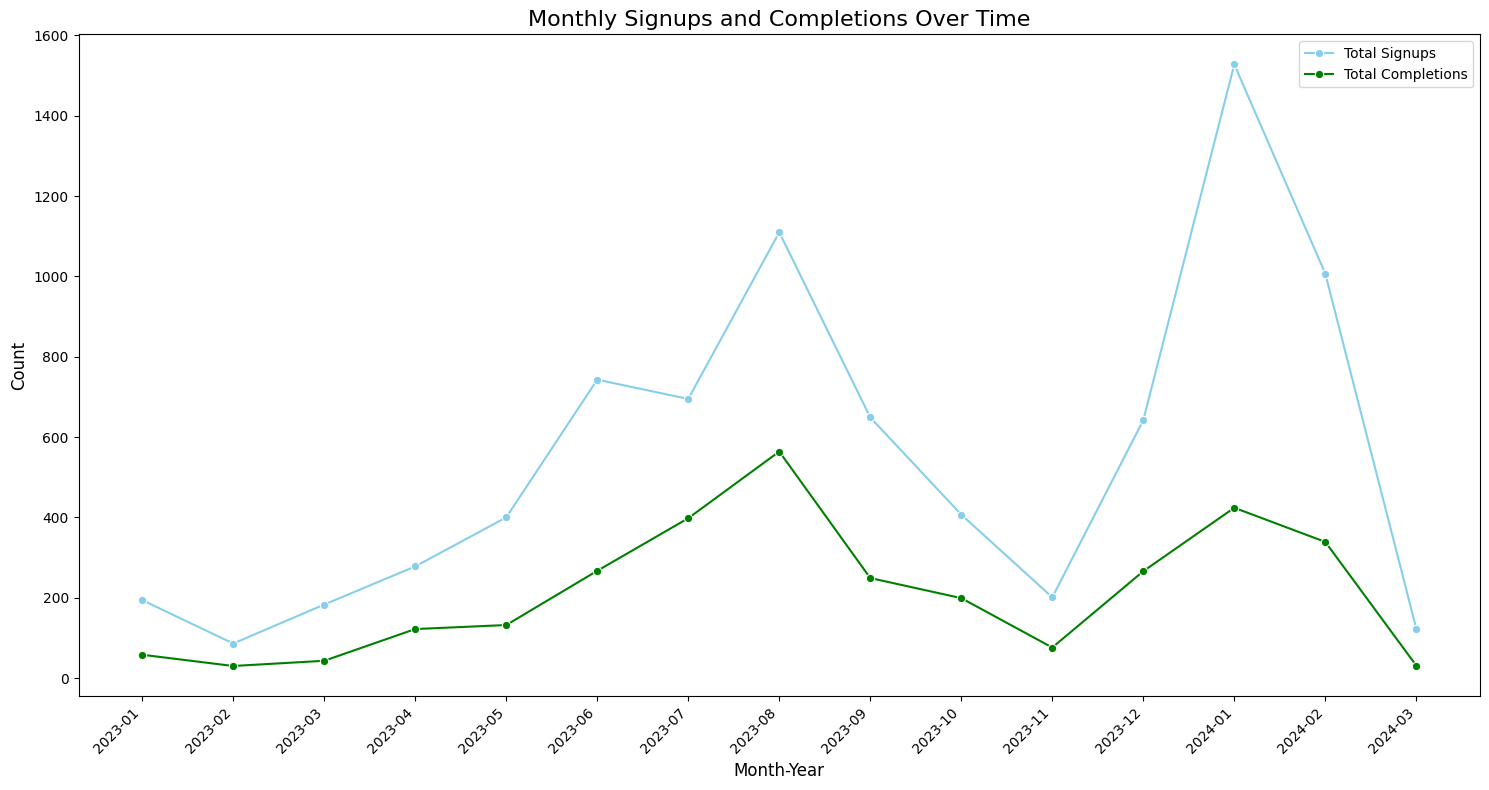

In [20]:
df['Signup_YearMonth'] = df['Learner SignUp DateTime'].dt.to_period('M')
monthly_trends = df.groupby('Signup_YearMonth', as_index=False).agg(
    Total_Signups=('Opportunity Id', 'count'),
    Total_Completions=('Is_Completed', 'sum')
)
# Convert Period to string for plotting
monthly_trends['Signup_YearMonth'] = monthly_trends['Signup_YearMonth'].astype(str)


plt.figure(figsize=(15, 8))
sns.lineplot(x='Signup_YearMonth', y='Total_Signups', data=monthly_trends, marker='o', label='Total Signups', color='skyblue')
sns.lineplot(x='Signup_YearMonth', y='Total_Completions', data=monthly_trends, marker='o', label='Total Completions', color='green')
plt.title('Monthly Signups and Completions Over Time', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Total Signups: 8246
Total Completions (Refined Definition): 3198
Overall Completion Rate (Refined Definition): 38.78%


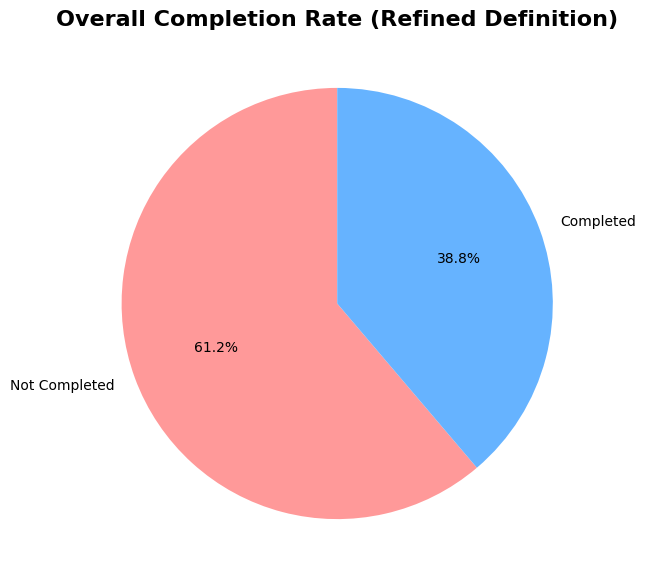

In [18]:
# Define completed statuses based on your refined definition
completed_statuses = ['Team Allocated', 'Rewards Award']

# Create the 'Is_Completed' column: 1 for completed, 0 for not completed
df['Is_Completed'] = df['Status Description'].apply(lambda x: 1 if x in completed_statuses else 0)

# Calculate overall completion rate
total_signups = df.shape[0]
total_completions_refined = df['Is_Completed'].sum()
completion_rate_refined = (total_completions_refined / total_signups) * 100

print(f"Total Signups: {total_signups}")
print(f"Total Completions (Refined Definition): {total_completions_refined}")
print(f"Overall Completion Rate (Refined Definition): {completion_rate_refined:.2f}%")

# Visualize the overall completion rate with a pie chart
plt.figure(figsize=(7, 7))
completion_counts = df['Is_Completed'].value_counts().sort_index()  # 0 = Not Completed, 1 = Completed
plt.pie(completion_counts, 
        labels=['Not Completed', 'Completed'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#ff9999', '#66b3ff'])
plt.title('Overall Completion Rate (Refined Definition)', fontsize=16, fontweight='bold')
plt.show()


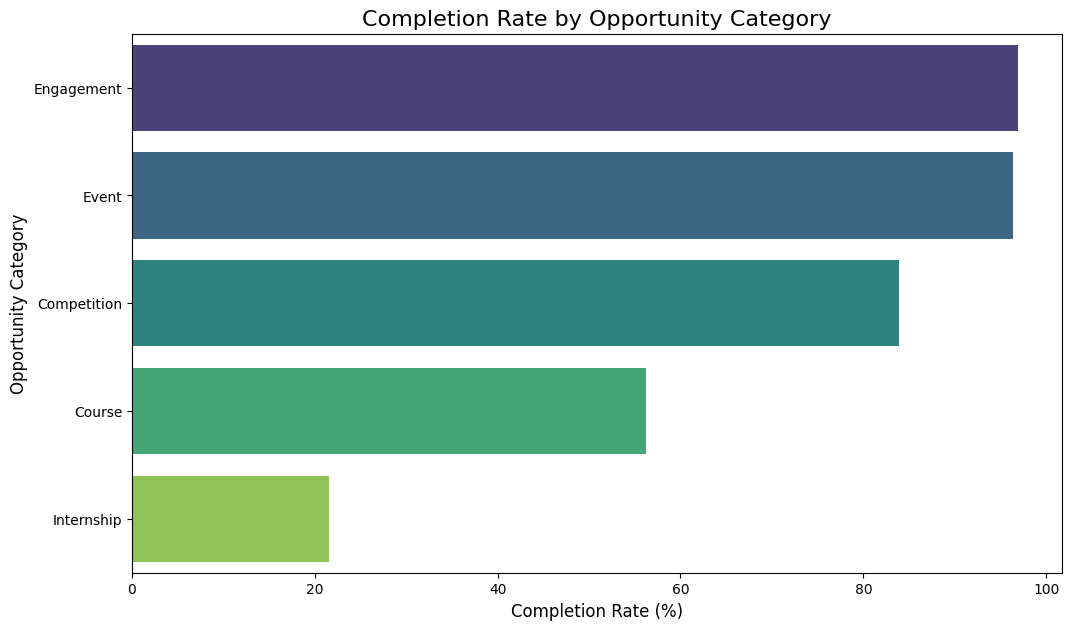

In [19]:
plt.figure(figsize=(12, 7))
# Using the 'as_index=False' or 'include_groups=False' is the modern way
category_completion_refined = df.groupby('Opportunity Category', as_index=False)['Is_Completed'].mean()
category_completion_refined['Completion Rate'] = category_completion_refined['Is_Completed'] * 100

sns.barplot(x='Completion Rate', y='Opportunity Category', data=category_completion_refined.sort_values('Completion Rate', ascending=False), palette='viridis', hue='Opportunity Category', dodge=False)
plt.title('Completion Rate by Opportunity Category', fontsize=16)
plt.xlabel('Completion Rate (%)', fontsize=12)
plt.ylabel('Opportunity Category', fontsize=12)
plt.legend([],[], frameon=False)
plt.show()

Descriptive statistics for Time_to_Apply (in days):
count     8246.000000
mean     -1288.737570
std       7686.833691
min     -45355.000000
25%          0.000000
50%          2.000000
75%         86.000000
max        426.000000
Name: Time_to_Apply, dtype: float64


C:\Users\sumai\AppData\Local\Temp\ipykernel_8880\1414786640.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Completed', y='Time_to_Apply', data=df, palette='viridis')


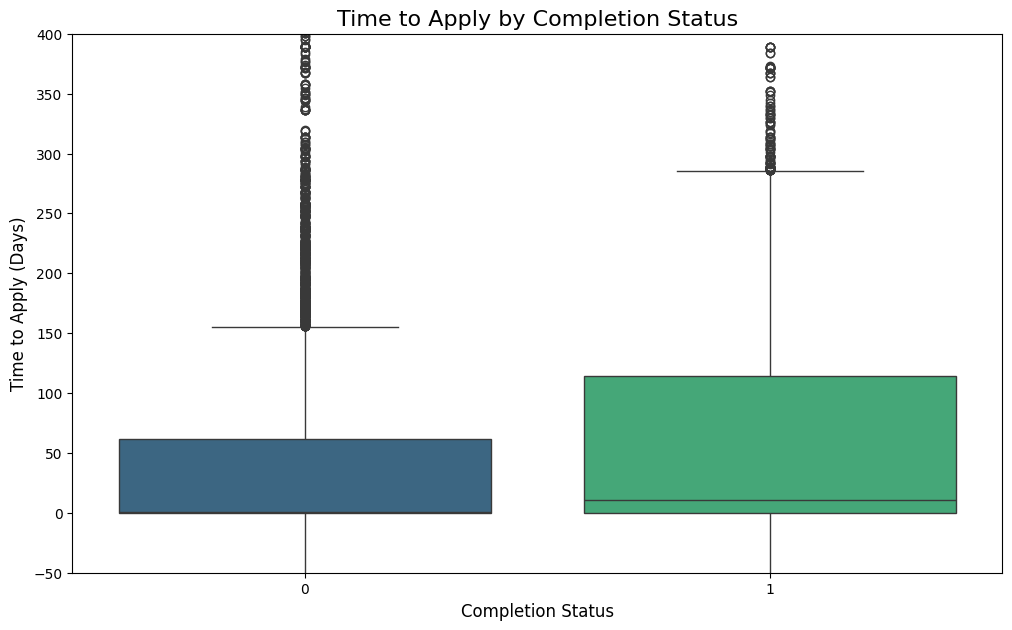

In [23]:
# Convert columns to datetime (if not already)
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'], errors='coerce')
df['Apply Date'] = pd.to_datetime(df['Apply Date'], errors='coerce')

# Calculate the difference in days
df['Time_to_Apply'] = (df['Apply Date'] - df['Learner SignUp DateTime']).dt.days

# Display descriptive statistics
print("Descriptive statistics for Time_to_Apply (in days):")
print(df['Time_to_Apply'].describe())

# Visualize distribution by completion status
plt.figure(figsize=(12, 7))
sns.boxplot(x='Is_Completed', y='Time_to_Apply', data=df, palette='viridis')
plt.title('Time to Apply by Completion Status', fontsize=16)
plt.xlabel('Completion Status', fontsize=12)
plt.ylabel('Time to Apply (Days)', fontsize=12)
plt.ylim(-50, 400)  # cap y-axis for better visualization
plt.show()

['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity Name', 'Opportunity Category', 'Opportunity End Date', 'First Name', 'Date of Birth', 'Gender', 'Country', 'Institution Name', 'Current/Intended Major', 'Entry created at', 'Status Description', 'Status Code', 'Apply Date', 'Opportunity Start Date', 'Age ', 'Opportunity Duration', 'Normalized Age', 'Normalized Status Code', 'Normalized Opportunity Duration', 'Encoded Gender', 'Encoded Opportunity Category', 'Encoded Country', 'Extracted SignUp month', 'Extracted SignUp Year', 'Extracted SignUp Day', 'Weekly Patterns', 'Seasonal Patterns', 'Engagement Days', 'Duration × Age', 'Engagement Score', 'Signup_Month', 'Completion_Month', 'Completion Status', 'Is_Completed', 'Signup_YearMonth', 'Time_to_Apply']


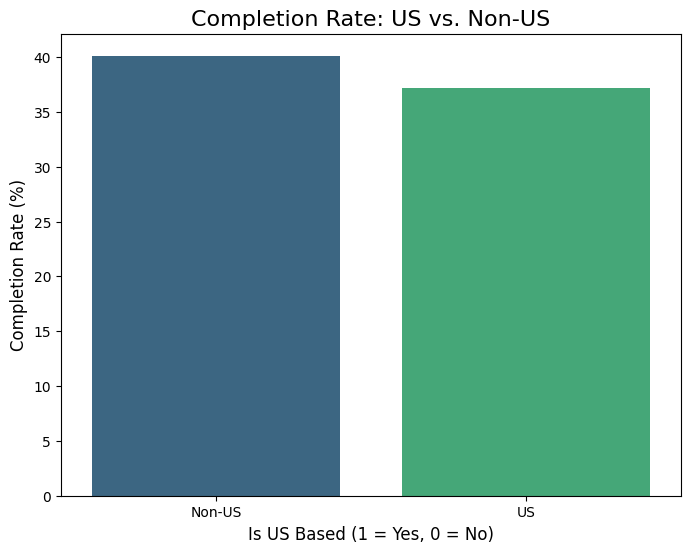

In [ ]:
# Check all column names
print(df.columns.tolist())

# If you have a column like 'Country' instead of 'Is_US_Based', you can create the flag:
if 'Is_US_Based' not in df.columns:
    df['Is_US_Based'] = df['Country'].apply(lambda x: 1 if x == 'United States' else 0)

# Now calculate completion rate by US vs Non-US
us_completion = df.groupby('Is_US_Based', as_index=False)['Is_Completed'].mean()
us_completion['Completion Rate'] = us_completion['Is_Completed'] * 100

# Visualize
plt.figure(figsize=(8, 6))
sns.barplot(x='Is_US_Based', y='Completion Rate', data=us_completion,
            palette='viridis', hue='Is_US_Based', dodge=False)
plt.title('Completion Rate: US vs. Non-US', fontsize=16)
plt.xlabel('Is US Based (1 = Yes, 0 = No)', fontsize=12)
plt.ylabel('Completion Rate (%)', fontsize=12)
plt.xticks([0, 1], ['Non-US', 'US'])
plt.legend([], [], frameon=False)
plt.show()


Seasonal Trends:

In [40]:
# Ensure date columns are datetime
for col in ['Opportunity Start Date', 'Opportunity End Date']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Extract weekly patterns (weekday names)
for col in ['Opportunity Start Date', 'Opportunity End Date']:
    if col in df.columns:
        df[col + ' Weekday'] = df[col].dt.day_name()

# Extract seasonal patterns (approximation)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

for col in ['Opportunity Start Date', 'Opportunity End Date']:
    if col in df.columns:
        df[col + ' Season'] = df[col].dt.month.apply(get_season)

# Prepare weekly pattern counts
weekly_data = pd.DataFrame()
for col in ['Opportunity Start Date Weekday', 'Opportunity End Date Weekday']:
    if col in df.columns:
        counts = df[col].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
        temp = pd.DataFrame({'Category': counts.index, 'Count': counts.values, 'Type': col})
        weekly_data = pd.concat([weekly_data, temp], ignore_index=True)

# Weekly Patterns Line Chart
fig_weekly = px.line(
    weekly_data,
    x='Category',
    y='Count',
    color='Type',
    markers=True,
    title='Weekly Patterns: Opportunity Start & End Dates'
)
fig_weekly.update_layout(template='plotly_white', xaxis_title='Weekday', yaxis_title='Number of Opportunities')
fig_weekly.show()

# Prepare seasonal pattern counts
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_data = pd.DataFrame()
for col in ['Opportunity Start Date Season', 'Opportunity End Date Season']:
    if col in df.columns:
        counts = df[col].value_counts().reindex(season_order)
        temp = pd.DataFrame({'Category': counts.index, 'Count': counts.values, 'Type': col})
        seasonal_data = pd.concat([seasonal_data, temp], ignore_index=True)

# Seasonal Patterns Line Chart
fig_seasonal = px.line(
    seasonal_data,
    x='Category',
    y='Count',
    color='Type',
    markers=True,
    title='Seasonal Patterns: Opportunity Start & End Dates'
)
fig_seasonal.update_layout(template='plotly_white', xaxis_title='Season', yaxis_title='Number of Opportunities')
fig_seasonal.show()


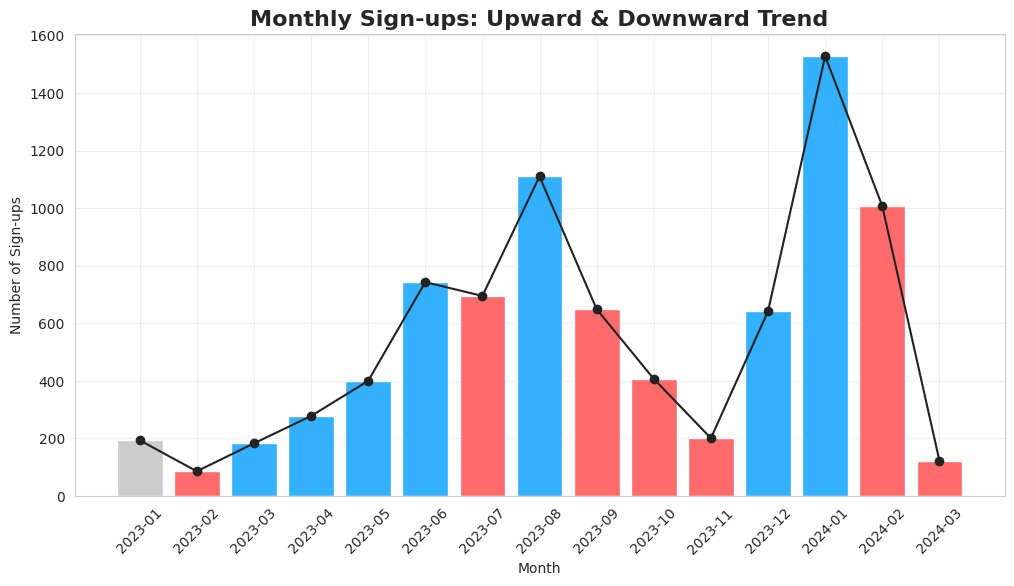

In [17]:
# =====================================================================
# 📈 Upward & Downward Trend Analysis
# =====================================================================
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Ensure SignUp datetime is in proper format
if 'Learner SignUp DateTime' in df.columns:
    df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'])
    df['SignUp_Month'] = df['Learner SignUp DateTime'].dt.to_period('M')

# Monthly signups
if 'SignUp_Month' in df.columns:
    monthly_signups = df['SignUp_Month'].value_counts().sort_index()
    monthly_signups = monthly_signups.reset_index()
    monthly_signups.columns = ['Month', 'Signups']

    # Identify trend direction
    monthly_signups['Trend'] = monthly_signups['Signups'].diff().fillna(0)
    monthly_signups['Direction'] = monthly_signups['Trend'].apply(lambda x: 'Up' if x > 0 else ('Down' if x < 0 else 'Stable'))

    # Plot
    plt.figure(figsize=(12,6))
    colors = monthly_signups['Direction'].map({'Up':'#33b1ff', 'Down':'#ff6b6b', 'Stable':'#cccccc'})
    plt.bar(monthly_signups['Month'].astype(str), monthly_signups['Signups'], color=colors)
    plt.plot(monthly_signups['Month'].astype(str), monthly_signups['Signups'], color='#222222', marker='o')
    plt.title("Monthly Sign-ups: Upward & Downward Trend", fontsize=16, fontweight='bold')
    plt.xlabel("Month")
    plt.ylabel("Number of Sign-ups")
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.show()


Cyclical trends

In [42]:
season_order = ['Winter','Spring','Summer','Fall']
season_engagement = df.groupby('Seasonal Patterns')['Engagement Score'].mean().reindex(season_order)

# Plot
fig_seasonal = px.line(
    x=season_engagement.index,
    y=season_engagement.values,
    markers=True,
    title="Average Engagement Score by Season",
    labels={'x':'Season', 'y':'Average Engagement Score'}
)
fig_seasonal.update_traces(line=dict(color='#FF6F61', width=3), marker=dict(size=8))
fig_seasonal.update_layout(template='plotly_white')
fig_seasonal.show()


Statistical & Outliers Analysis

Global Outliers:

🔹 Z-Score Outliers
Age : 145 potential outliers (|Z| > 3)
Opportunity Duration: 0 potential outliers (|Z| > 3)
Normalized Age: 0 potential outliers (|Z| > 3)
Normalized Opportunity Duration: 0 potential outliers (|Z| > 3)
Duration × Age: 0 potential outliers (|Z| > 3)
Engagement Score: 0 potential outliers (|Z| > 3)

🔹 IQR Outliers
Age : 470 potential outliers (IQR method)
Opportunity Duration: 0 potential outliers (IQR method)
Normalized Age: 0 potential outliers (IQR method)
Normalized Opportunity Duration: 0 potential outliers (IQR method)
Duration × Age: 0 potential outliers (IQR method)
Engagement Score: 0 potential outliers (IQR method)


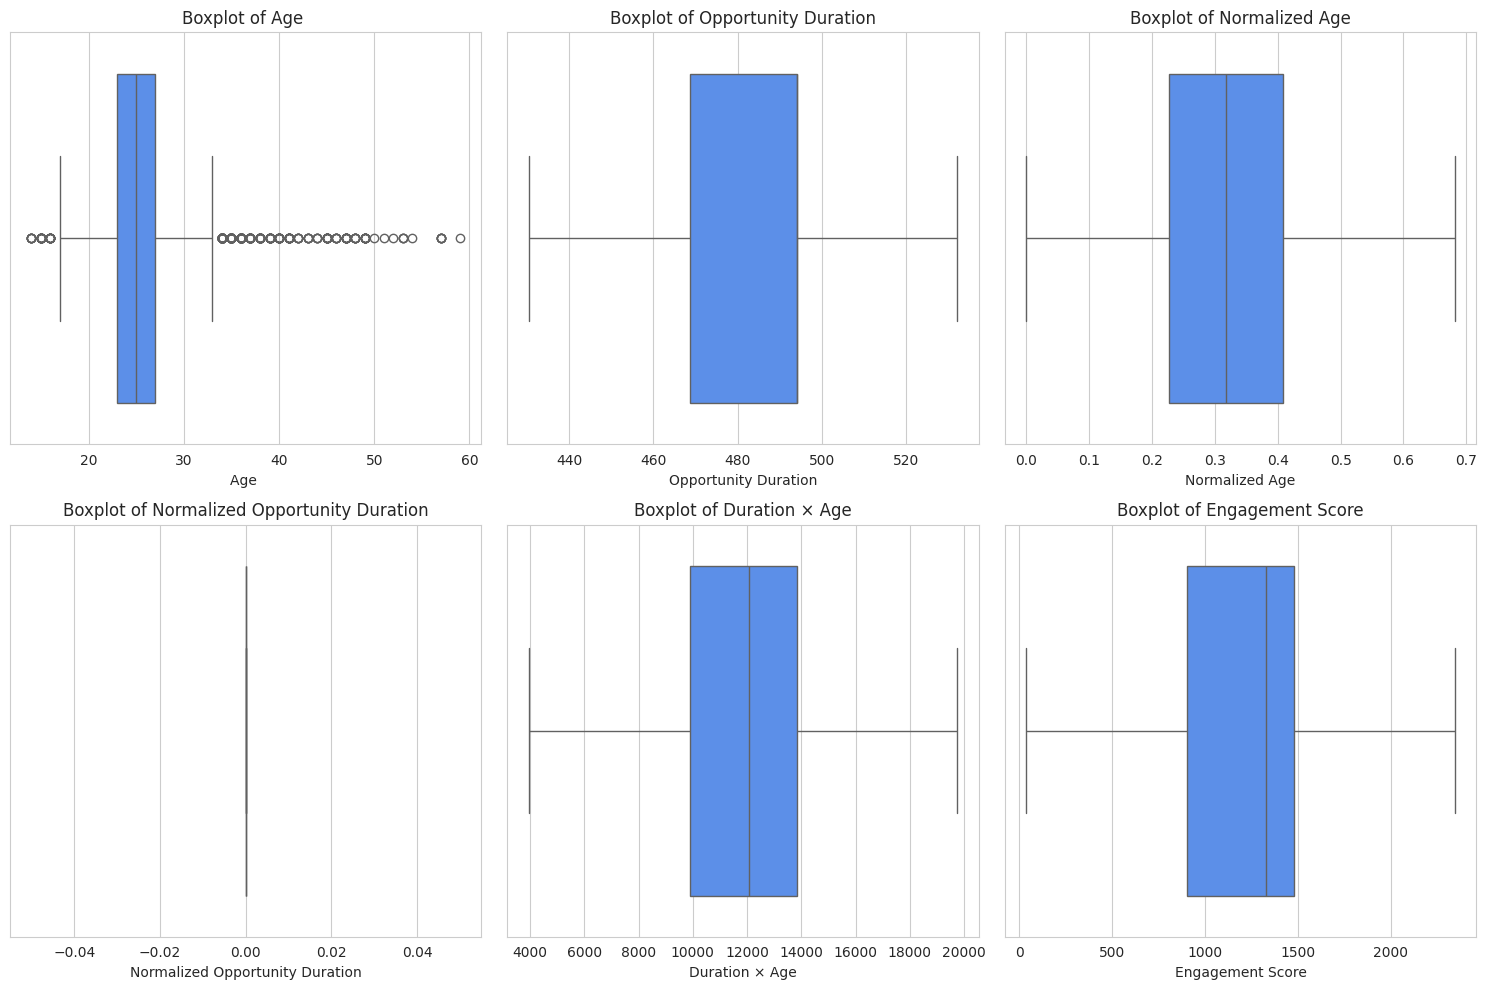

In [48]:
# Numeric columns to check
numeric_cols = ["Age ", "Opportunity Duration", "Normalized Age",
                "Normalized Opportunity Duration", "Duration × Age", "Engagement Score"]

# ------------------------------
# 1. Z-Score Method
# ------------------------------
print("🔹 Z-Score Outliers")
z_scores = df[numeric_cols].apply(zscore, nan_policy='omit')
z_outliers = (np.abs(z_scores) > 3)
for col in numeric_cols:
    count = z_outliers[col].sum()
    print(f"{col}: {count} potential outliers (|Z| > 3)")

# ------------------------------
# 2. IQR Method
# ------------------------------
print("\n🔹 IQR Outliers")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} potential outliers (IQR method)")

# ------------------------------
# 3. Boxplots for Visualization
# ------------------------------
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col], color="#4589ff")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

Contextual Outliers:

C:\Users\sumai\AppData\Local\Temp\ipykernel_5740\3574049339.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\sumai\AppData\Local\Temp\ipykernel_5740\3574049339.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Total contextual outliers (by Age Group): 23


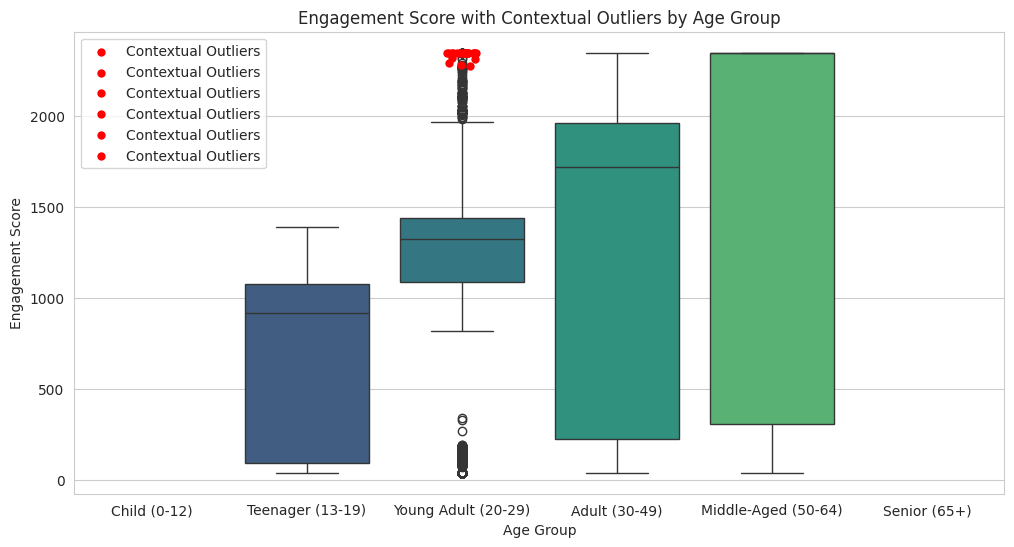

In [55]:
# Make sure 'Age Group' exists
if 'Age Group' not in df.columns:
    bins = [0, 12, 19, 29, 49, 64, 120]
    labels = ['Child (0-12)', 'Teenager (13-19)', 'Young Adult (20-29)',
              'Adult (30-49)', 'Middle-Aged (50-64)', 'Senior (65+)']
    df['Age Group'] = pd.cut(df['Age '], bins=bins, labels=labels, right=True)

# Context: Engagement Score within each Age Group
contextual_outliers = pd.DataFrame()

# Using Z-Score threshold within each group
z_threshold = 2  # can adjust 2 or 3 standard deviations

for group, data in df.groupby('Age Group'):
    if len(data) > 1:  # avoid division by zero
        group_mean = data['Engagement Score'].mean()
        group_std = data['Engagement Score'].std()
        z_scores = (data['Engagement Score'] - group_mean) / group_std
        outliers = data[np.abs(z_scores) > z_threshold]
        contextual_outliers = pd.concat([contextual_outliers, outliers])

print(f"Total contextual outliers (by Age Group): {len(contextual_outliers)}")
contextual_outliers[['Age ', 'Age Group', 'Engagement Score']]
plt.figure(figsize=(12,6))
sns.boxplot(x='Age Group', y='Engagement Score', data=df, palette='viridis')
sns.stripplot(x='Age Group', y='Engagement Score', data=contextual_outliers,
              color='red', size=6, jitter=True, label='Contextual Outliers')
plt.title('Engagement Score with Contextual Outliers by Age Group')
plt.ylabel('Engagement Score')
plt.xlabel('Age Group')
plt.legend()
plt.show()

Collective Outliers:

In [20]:
# Aggregate Engagement by Apply Date
daily_engagement = df.groupby('Apply Date')['Engagement Score'].sum()

# Compute rolling mean and standard deviation
rolling_mean = daily_engagement.rolling(7, center=True).mean()
rolling_std = daily_engagement.rolling(7, center=True).std()

# Flag collective outliers: points far from rolling mean (e.g., >2 std)
collective_outliers = daily_engagement[(daily_engagement - rolling_mean).abs() > 2*rolling_std]

print("Collective outliers (spikes in daily engagement):")
print(collective_outliers)


# Collective outliers line chart
fig = px.line(daily_engagement, title='Daily Engagement Score with Collective Outliers')
fig.add_scatter(x=collective_outliers.index, y=collective_outliers.values, mode='markers', 
                name='Collective Outliers', marker=dict(color='red', size=10))
fig.show()


Collective outliers (spikes in daily engagement):
Apply Date
1/1/2024 22:44       37.893238
1/1/2024 5:21        37.893238
1/10/2024 3:44       37.893238
1/11/2024 20:17    2938.729542
1/11/2024 6:18     2591.194847
                      ...     
9/28/2023 21:27      37.893238
9/6/2023 19:38      120.450330
9/9/2023 14:57     2103.979424
9/9/2023 21:58      121.379493
9/9/2023 22:38      141.068969
Name: Engagement Score, Length: 283, dtype: float64


Total collective outliers (Engagement vs Duration): 0


Empty DataFrame
Columns: [Age , Age Group, Engagement Score, Opportunity Duration]
Index: []

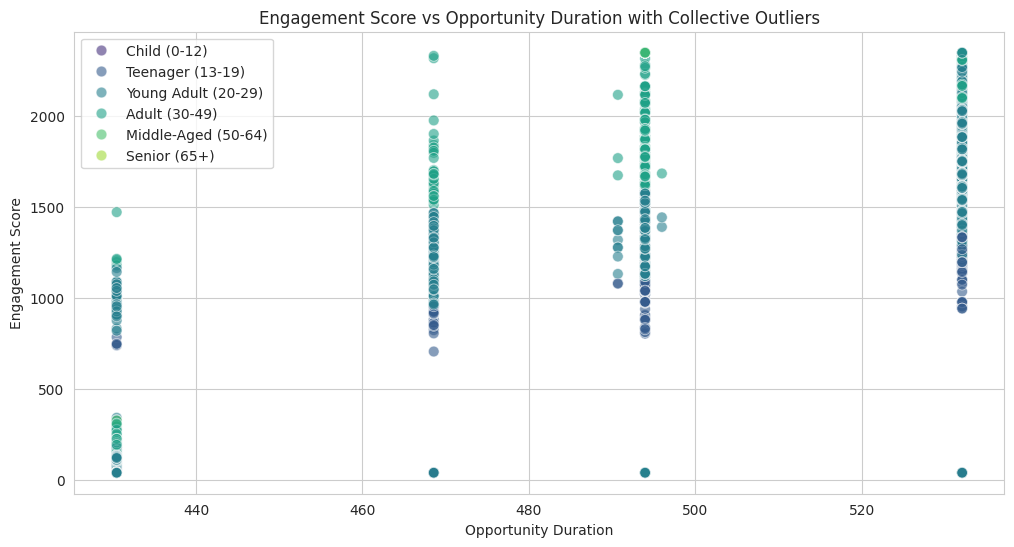

In [ ]:
# --- Ensure Age Group exists ---
if 'Age Group' not in df.columns:
    bins = [0, 12, 19, 29, 49, 64, 120]
    labels = ['Child (0-12)', 'Teenager (13-19)', 'Young Adult (20-29)',
              'Adult (30-49)', 'Middle-Aged (50-64)', 'Senior (65+)']
    df['Age Group'] = pd.cut(df['Age '], bins=bins, labels=labels, right=True)

# --- Z-Score method for collective outliers ---
z_threshold = 2  # adjust threshold to be more or less strict

# Compute Z-scores
df['Z_Engagement'] = (df['Engagement Score'] - df['Engagement Score'].mean()) / df['Engagement Score'].std()
df['Z_Duration'] = (df['Opportunity Duration'] - df['Opportunity Duration'].mean()) / df['Opportunity Duration'].std()

# Identify collective outliers
collective_outliers = df[(np.abs(df['Z_Engagement']) > z_threshold) &
                         (np.abs(df['Z_Duration']) > z_threshold)]

print(f"Total collective outliers (Engagement vs Duration): {len(collective_outliers)}")
display(collective_outliers[['Age ', 'Age Group', 'Engagement Score', 'Opportunity Duration']])

# --- Visualization ---
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Opportunity Duration', y='Engagement Score', data=df,
                hue='Age Group', palette='viridis', alpha=0.6, s=60, legend='brief')

# Highlight collective outliers in red
if len(collective_outliers) > 0:
    sns.scatterplot(x='Opportunity Duration', y='Engagement Score', data=collective_outliers,
                    color='red', s=80, label='Collective Outliers')

plt.title('Engagement Score vs Opportunity Duration with Collective Outliers')
plt.xlabel('Opportunity Duration')
plt.ylabel('Engagement Score')
plt.legend()
plt.show()
